In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import datetime as dt
from datetime import datetime

from wordcloud import WordCloud

import warnings
warnings.filterwarnings("ignore")
!pip install wordcloud


In [4]:
pip install --upgrade numpy pandas matplotlib seaborn wordcloud


  Using cached numpy-2.1.2-cp311-cp311-win_amd64.whl.metadata (59 kB)
Note: you may need to restart the kernel to use updated packages.


In [3]:
hotel=pd.read_csv('/Users/kiit/Downloads/Zomato Restaurant names and Metadata.csv')

#Loading Zomato Restaurant reviews Dataset
review=pd.read_csv('/Users/kiit/Downloads/Zomato Restaurant reviews.csv')

In [4]:
hotel.head()

Name  \
0                 Beyond Flavours   
1                        Paradise   
2                        Flechazo   
3  Shah Ghouse Hotel & Restaurant   
4      Over The Moon Brew Company   

                                               Links   Cost  \
0  https://www.zomato.com/hyderabad/beyond-flavou...    800   
1  https://www.zomato.com/hyderabad/paradise-gach...    800   
2  https://www.zomato.com/hyderabad/flechazo-gach...  1,300   
3  https://www.zomato.com/hyderabad/shah-ghouse-h...    800   
4  https://www.zomato.com/hyderabad/over-the-moon...  1,200   

                                         Collections  \
0  Food Hygiene Rated Restaurants in Hyderabad, C...   
1                                Hyderabad's Hottest   
2                 Great Buffets, Hyderabad's Hottest   
3                             Late Night Restaurants   
4  Best Bars & Pubs, Food Hygiene Rated Restauran...   

                                            Cuisines  \
0  Chinese, Continental, Kebab, European, South I...   
1                     Biryani, North Indian, Chinese   
2       Asian, Mediterranean, North Indian, Desserts   
3  Biryani, North Indian, Chinese, Seafood, Bever...   
4  Asian, Continental, North Indian, Chinese, Med...   

                                             Timings  
0      12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)  
1                                     11 AM to 11 PM  
2              11:30 AM to 4:30 PM, 6:30 PM to 11 PM  
3                                    12 Noon to 2 AM  
4  12noon to 11pm (Mon, Tue, Wed, Thu, Sun), 12no...

In [9]:
review.head()



Restaurant              Reviewer  \
0  Beyond Flavours     Rusha Chakraborty   
1  Beyond Flavours  Anusha Tirumalaneedi   
2  Beyond Flavours       Ashok Shekhawat   
3  Beyond Flavours        Swapnil Sarkar   
4  Beyond Flavours                Dileep   

                                              Review Rating  \
0  The ambience was good, food was quite good . h...      5   
1  Ambience is too good for a pleasant evening. S...      5   
2  A must try.. great food great ambience. Thnx f...      5   
3  Soumen das and Arun was a great guy. Only beca...      5   
4  Food is good.we ordered Kodi drumsticks and ba...      5   

                  Metadata             Time  Pictures  
0   1 Review , 2 Followers  5/25/2019 15:54         0  
1  3 Reviews , 2 Followers  5/25/2019 14:20         0  
2  2 Reviews , 3 Followers  5/24/2019 22:54         0  
3    1 Review , 1 Follower  5/24/2019 22:11         0  
4  3 Reviews , 2 Followers  5/24/2019 21:37         0

In [8]:
# Dataset Rows & Columns count
hotel.shape

(105, 6)

In [11]:
review.shape

(10000, 7)

In [12]:

# metadata Dataset Info
hotel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Name         105 non-null    object
 1   Links        105 non-null    object
 2   Cost         105 non-null    object
 3   Collections  51 non-null     object
 4   Cuisines     105 non-null    object
 5   Timings      104 non-null    object
dtypes: object(6)
memory usage: 5.1+ KB


In [13]:
# review Dataset Info
review.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Restaurant  10000 non-null  object
 1   Reviewer    9962 non-null   object
 2   Review      9955 non-null   object
 3   Rating      9962 non-null   object
 4   Metadata    9962 non-null   object
 5   Time        9962 non-null   object
 6   Pictures    10000 non-null  int64 
dtypes: int64(1), object(6)
memory usage: 547.0+ KB


In [14]:
print(len(hotel[hotel.duplicated()]))

0


In [15]:
#review Dataset Duplicate Value Count
print(len(review[review.duplicated()]))

36


In [13]:
review[review.duplicated()]



Restaurant Reviewer Review Rating Metadata Time  Pictures
8778  American Wild Wings      NaN    NaN    NaN      NaN  NaN         0
8779  American Wild Wings      NaN    NaN    NaN      NaN  NaN         0
8780  American Wild Wings      NaN    NaN    NaN      NaN  NaN         0
8781  American Wild Wings      NaN    NaN    NaN      NaN  NaN         0
8782  American Wild Wings      NaN    NaN    NaN      NaN  NaN         0
8783  American Wild Wings      NaN    NaN    NaN      NaN  NaN         0
8784  American Wild Wings      NaN    NaN    NaN      NaN  NaN         0
8785  American Wild Wings      NaN    NaN    NaN      NaN  NaN         0
8786  American Wild Wings      NaN    NaN    NaN      NaN  NaN         0
8787  American Wild Wings      NaN    NaN    NaN      NaN  NaN         0
8788  American Wild Wings      NaN    NaN    NaN      NaN  NaN         0
8789  American Wild Wings      NaN    NaN    NaN      NaN  NaN         0
8790  American Wild Wings      NaN    NaN    NaN      NaN  NaN         0
8791  American Wild Wings      NaN    NaN    NaN      NaN  NaN         0
8792  American Wild Wings      NaN    NaN    NaN      NaN  NaN         0
8793  American Wild Wings      NaN    NaN    NaN      NaN  NaN         0
8794  American Wild Wings      NaN    NaN    NaN      NaN  NaN         0
8795  American Wild Wings      NaN    NaN    NaN      NaN  NaN         0
8796  American Wild Wings      NaN    NaN    NaN      NaN  NaN         0
8797  American Wild Wings      NaN    NaN    NaN      NaN  NaN         0
8798  American Wild Wings      NaN    NaN    NaN      NaN  NaN         0
8799  American Wild Wings      NaN    NaN    NaN      NaN  NaN         0
9086         Arena Eleven      NaN    NaN    NaN      NaN  NaN         0
9087         Arena Eleven      NaN    NaN    NaN      NaN  NaN         0
9088         Arena Eleven      NaN    NaN    NaN      NaN  NaN         0
9089         Arena Eleven      NaN    NaN    NaN      NaN  NaN         0
9090         Arena Eleven      NaN    NaN    NaN      NaN  NaN         0
9091         Arena Eleven      NaN    NaN    NaN      NaN  NaN         0
9092         Arena Eleven      NaN    NaN    NaN      NaN  NaN         0
9093         Arena Eleven      NaN    NaN    NaN      NaN  NaN         0
9094         Arena Eleven      NaN    NaN    NaN      NaN  NaN         0
9095         Arena Eleven      NaN    NaN    NaN      NaN  NaN         0
9096         Arena Eleven      NaN    NaN    NaN      NaN  NaN         0
9097         Arena Eleven      NaN    NaN    NaN      NaN  NaN         0
9098         Arena Eleven      NaN    NaN    NaN      NaN  NaN         0
9099         Arena Eleven      NaN    NaN    NaN      NaN  NaN         0

In [12]:
hotel.isnull().sum()

Name            0
Links           0
Cost            0
Collections    54
Cuisines        0
Timings         1
dtype: int64

<Axes: >

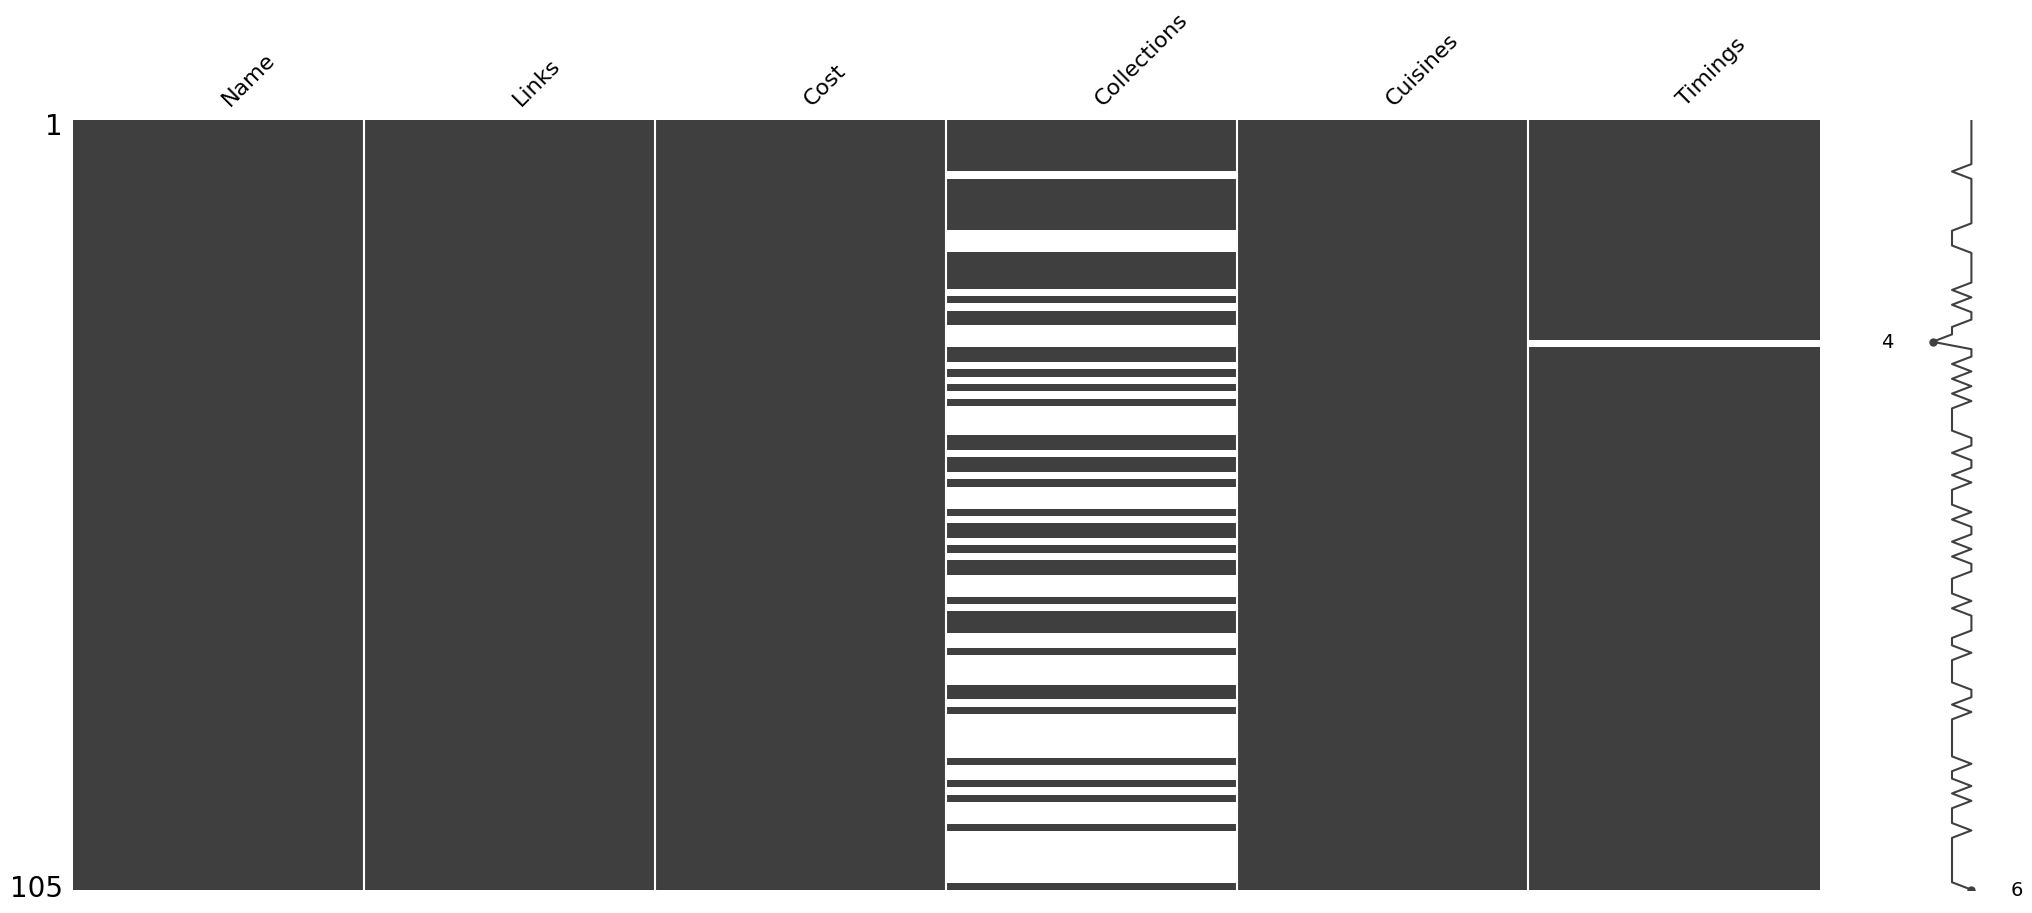

In [16]:
!pip install missingno

import missingno as msno
msno.matrix(hotel)

In [18]:
hotel[hotel['Timings'].isnull()]



Name                                              Links Cost  \
30  Pot Pourri  https://www.zomato.com/hyderabad/pot-pourri-ga...  900   

   Collections                            Cuisines Timings  
30         NaN  Andhra, South Indian, North Indian     NaN

In [20]:
review.isnull().sum()

Restaurant     0
Reviewer      38
Review        45
Rating        38
Metadata      38
Time          38
Pictures       0
dtype: int64

<Axes: >

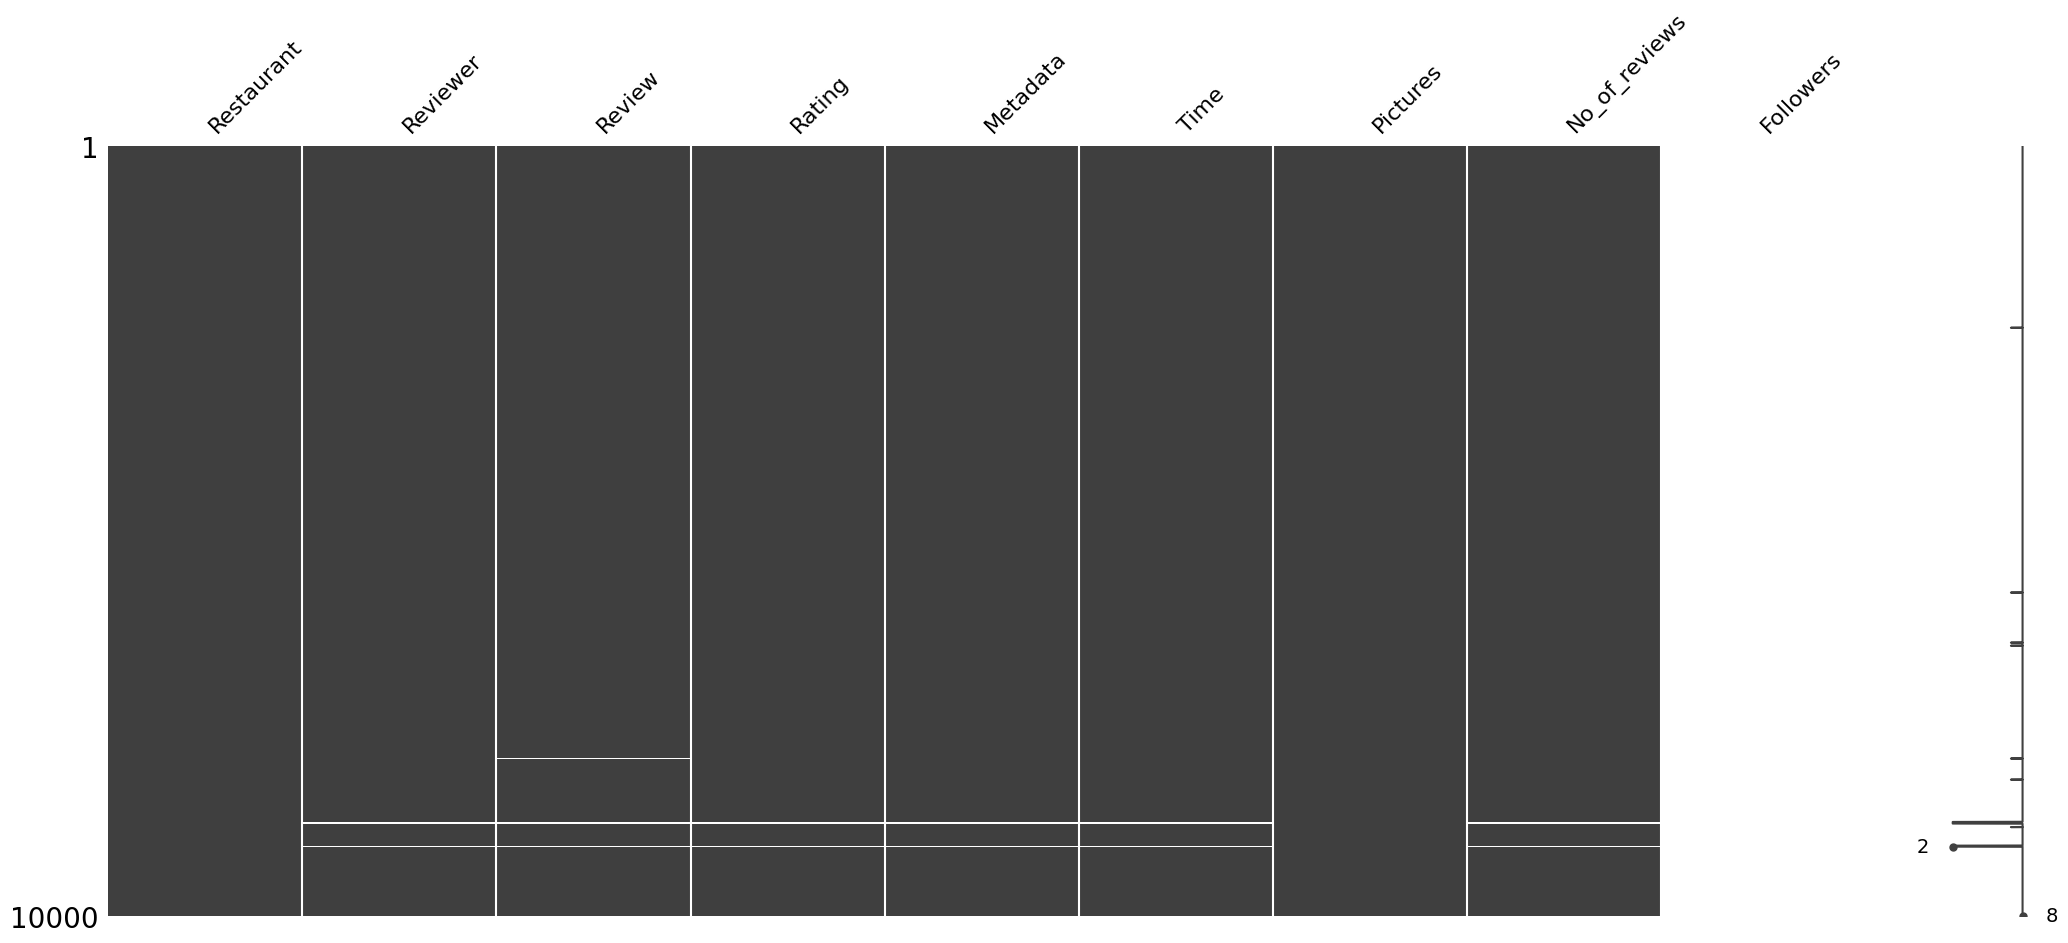

In [93]:
# Visualizing the missing values
import missingno as msno
msno.matrix(review)

In [21]:
hotel.columns

Index(['Name', 'Links', 'Cost', 'Collections', 'Cuisines', 'Timings'], dtype='object')

In [22]:
review.columns

Index(['Restaurant', 'Reviewer', 'Review', 'Rating', 'Metadata', 'Time',
       'Pictures'],
      dtype='object')

In [20]:
hotel.describe(include='all').T



count unique                                                top  \
Name          105    105                                    Beyond Flavours   
Links         105    105  https://www.zomato.com/hyderabad/beyond-flavou...   
Cost          105     29                                                500   
Collections    51     42        Food Hygiene Rated Restaurants in Hyderabad   
Cuisines      105     92                              North Indian, Chinese   
Timings       104     77                                     11 AM to 11 PM   

            freq  
Name           1  
Links          1  
Cost          13  
Collections    4  
Cuisines       4  
Timings        6

In [22]:
review.describe(include='all')



Restaurant     Reviewer Review Rating  Metadata             Time  \
count             10000         9962   9955   9962      9962             9962   
unique              100         7446   9364     10      2477             9782   
top     Beyond Flavours  Parijat Ray   good      5  1 Review  7/29/2018 20:34   
freq                100           13    237   3832       919                3   
mean                NaN          NaN    NaN    NaN       NaN              NaN   
std                 NaN          NaN    NaN    NaN       NaN              NaN   
min                 NaN          NaN    NaN    NaN       NaN              NaN   
25%                 NaN          NaN    NaN    NaN       NaN              NaN   
50%                 NaN          NaN    NaN    NaN       NaN              NaN   
75%                 NaN          NaN    NaN    NaN       NaN              NaN   
max                 NaN          NaN    NaN    NaN       NaN              NaN   

            Pictures  
count   10000.000000  
unique           NaN  
top              NaN  
freq             NaN  
mean        0.748600  
std         2.570381  
min         0.000000  
25%         0.000000  
50%         0.000000  
75%         0.000000  
max        64.000000

In [25]:
for col in hotel.columns:
  print("Column:",col,"\n",hotel[col].nunique())
  print('--'*70)

Column: Name 
 105
--------------------------------------------------------------------------------------------------------------------------------------------
Column: Links 
 105
--------------------------------------------------------------------------------------------------------------------------------------------
Column: Cost 
 29
--------------------------------------------------------------------------------------------------------------------------------------------
Column: Collections 
 42
--------------------------------------------------------------------------------------------------------------------------------------------
Column: Cuisines 
 92
--------------------------------------------------------------------------------------------------------------------------------------------
Column: Timings 
 77
--------------------------------------------------------------------------------------------------------------------------------------------


In [26]:
for col in review.columns:
  print("Column:",col,"\n",review[col].nunique())
  print('--'*70)

Column: Restaurant 
 100
--------------------------------------------------------------------------------------------------------------------------------------------
Column: Reviewer 
 7446
--------------------------------------------------------------------------------------------------------------------------------------------
Column: Review 
 9364
--------------------------------------------------------------------------------------------------------------------------------------------
Column: Rating 
 10
--------------------------------------------------------------------------------------------------------------------------------------------
Column: Metadata 
 2477
--------------------------------------------------------------------------------------------------------------------------------------------
Column: Time 
 9782
--------------------------------------------------------------------------------------------------------------------------------------------
Column: Pictures 
 

In [27]:
print("Column:",'Rating',"\n",review['Rating'].unique())  

Column: Rating 
 ['5' '4' '1' '3' '2' '3.5' '4.5' '2.5' '1.5' 'Like' nan]


In [28]:
review.drop_duplicates(keep=False,inplace=True)

In [29]:
review['Rating']=review['Rating'].str.replace("Like",'4').astype('float')

In [106]:
# Splitting the Metadata into two parts: No_of_reviews and Followers
review[['No_of_reviews', 'Followers']] = review['Metadata'].str.split(',', expand=True)

# Clean the No_of_reviews column by extracting the first part (numeric) before the word "Reviews"
review['No_of_reviews'] = review['No_of_reviews'].str.extract('(\d+)').astype(float)

# Clean the Followers column by extracting the first part (numeric) before the word "Followers"
review['Followers'] = review['Followers'].str.extract('(\d+)').astype(float)

# Check the output
print(review[['No_of_reviews', 'Followers']].head())


   No_of_reviews  Followers
0            1.0        2.0
1            3.0        2.0
2            2.0        3.0
3            1.0        1.0
4            3.0        2.0


In [109]:
# Convert the columns to integers, if needed
review['No_of_reviews'] = review['No_of_reviews'].astype('Int64')
review['Followers'] = review['Followers'].astype('Int64')

# Check the updated output
print(review[['No_of_reviews', 'Followers']].head())


   No_of_reviews  Followers
0              1          2
1              3          2
2              2          3
3              1          1
4              3          2


In [114]:
# Fill missing values (NaN) with 0 if desired
review['No_of_reviews'].fillna(0, inplace=True)
review['Followers'].fillna(0, inplace=True)

# Ensure they are integer
review['No_of_reviews'] = review['No_of_reviews'].astype('Int64')
review['Followers'] = review['Followers'].astype('Int64')

# Check the updated output
print(review[['No_of_reviews', 'Followers']].head())


   No_of_reviews  Followers
0              1          2
1              3          2
2              2          3
3              1          1
4              3          2


In [36]:
review['Followers'].fillna(0,inplace=True)
     

In [37]:
review['Time']=pd.to_datetime(review['Time'])
review['Year']=pd.DatetimeIndex(review['Time']).year
review['Hour'] = pd.DatetimeIndex(review['Time']).hour 

In [38]:
review.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9962 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Restaurant     9962 non-null   object        
 1   Reviewer       9962 non-null   object        
 2   Review         9955 non-null   object        
 3   Rating         9962 non-null   float64       
 4   Metadata       9962 non-null   object        
 5   Time           9962 non-null   datetime64[ns]
 6   Pictures       9962 non-null   int64         
 7   No_of_reviews  9962 non-null   int64         
 8   Followers      9962 non-null   float64       
 9   Year           9962 non-null   int32         
 10  Hour           9962 non-null   int32         
dtypes: datetime64[ns](1), float64(2), int32(2), int64(2), object(4)
memory usage: 856.1+ KB


In [39]:
hotel.rename(columns={'Name':'Restaurant'},inplace=True)

In [40]:
hotel['Cost'].unique()

array(['800', '1,300', '1,200', '1,500', '500', '300', '1,000', '350',
       '400', '1,600', '750', '550', '1,900', '450', '150', '1,400',
       '1,100', '600', '200', '900', '700', '1,700', '2,500', '850',
       '650', '1,800', '2,800', '1,750', '250'], dtype=object)

In [41]:
hotel['Cost']=hotel['Cost'].str.replace(",","").astype("int64")

In [42]:
def get_no_of_cuisine(cuisine):
  Cuisine_list=list(str(cuisine).split(','))
  return len(Cuisine_list)

# Create a new column with no of cuisine in hotel dataframe
hotel['No_of_cuisine']=hotel['Cuisines'].apply(get_no_of_cuisine)

<Axes: ylabel='Cost'>

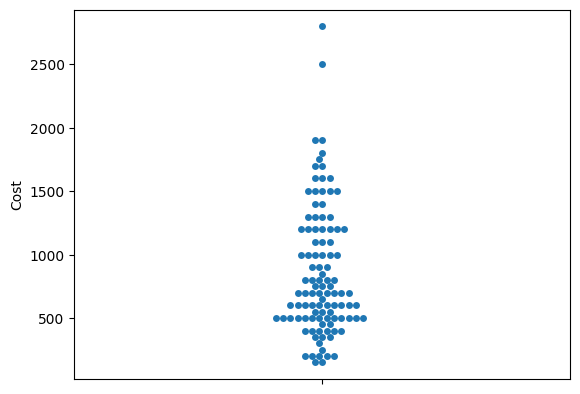

In [45]:
sns.swarmplot(hotel['Cost'])

In [46]:
costly_res=hotel[['Restaurant','Cost']].groupby('Restaurant',as_index=False).mean().sort_values(by='Cost',ascending=False).head(10).reset_index(drop=True)
costly_res

Restaurant    Cost
0               Collage - Hyatt Hyderabad Gachibowli  2800.0
1                   Feast - Sheraton Hyderabad Hotel  2500.0
2                                  10 Downing Street  1900.0
3  Jonathan's Kitchen - Holiday Inn Express & Suites  1900.0
4            Cascade - Radisson Hyderabad Hitec City  1800.0
5                    Zega - Sheraton Hyderabad Hotel  1750.0
6             Republic Of Noodles - Lemon Tree Hotel  1700.0
7              Mazzo - Marriott Executive Apartments  1700.0
8                                    Barbeque Nation  1600.0
9                                       Arena Eleven  1600.0

In [47]:
cheapest_res = hotel[['Restaurant','Cost']].groupby('Restaurant',as_index=False).mean().sort_values(by='Cost',ascending=True).head(10).reset_index(drop=True)
cheapest_res

Restaurant   Cost
0       Mohammedia Shawarma  150.0
1                      Amul  150.0
2              Sweet Basket  200.0
3                 KS Bakers  200.0
4             Momos Delight  200.0
5        Hunger Maggi Point  200.0
6            Asian Meal Box  200.0
7               Wich Please  250.0
8  Shah Ghouse Spl Shawarma  300.0
9                  Tempteys  350.0

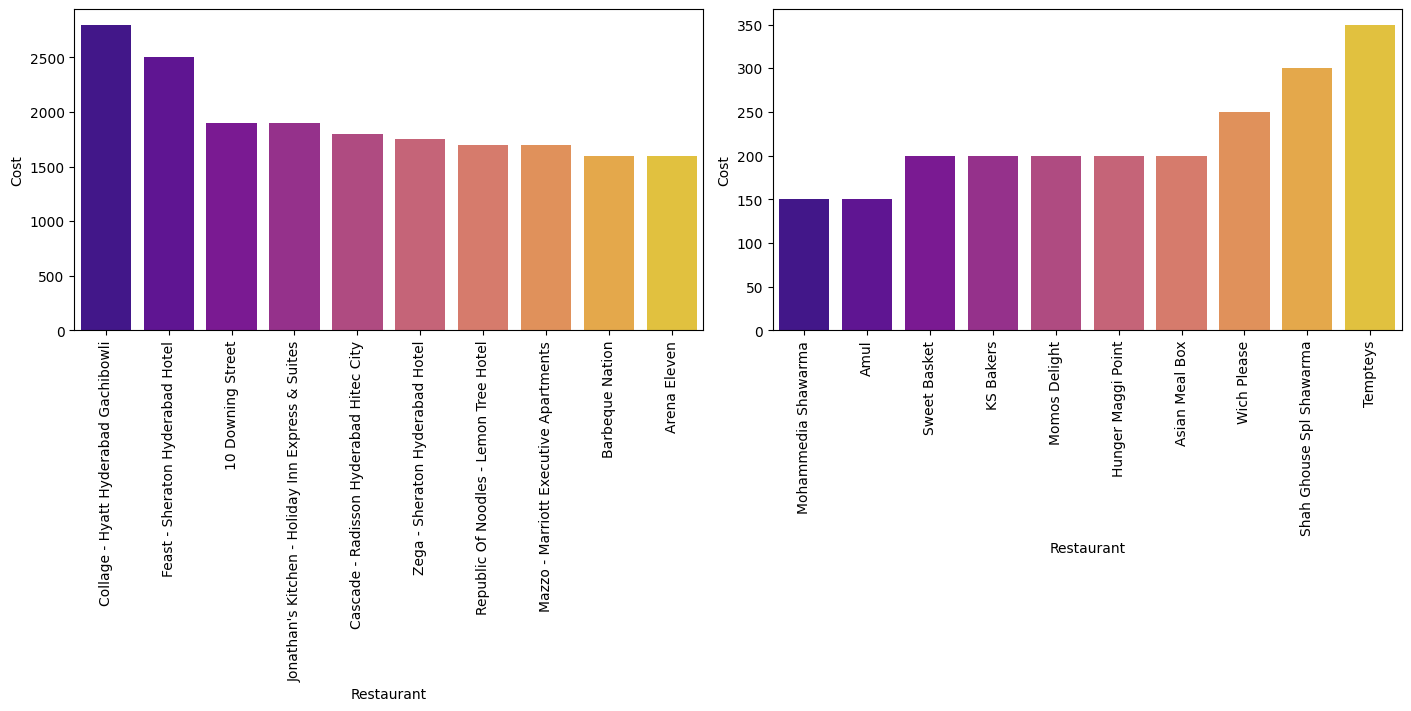

In [49]:
fig,axes=plt.subplots(nrows=1,ncols=2,constrained_layout=True,figsize=(14,7))
#costliest restaurant
a=sns.barplot(x = 'Restaurant',y = 'Cost',data = costly_res,ax = axes[0],palette = 'plasma')
a.set_xticklabels(labels=costly_res['Restaurant'].to_list(),rotation=90)

#cheapest restaurant
b=sns.barplot(x = 'Restaurant',y = 'Cost',data = cheapest_res,ax = axes[1],palette = 'plasma')
b.set_xticklabels(labels=cheapest_res['Restaurant'].to_list(),rotation=90)
plt.show()


(-0.5, 1999.5, 1999.5, -0.5)

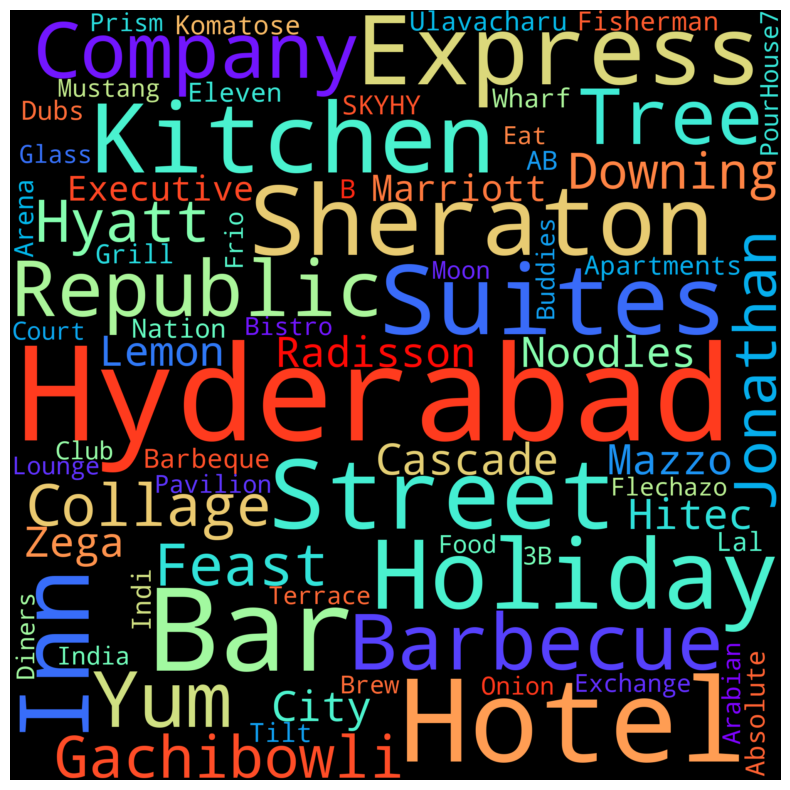

In [51]:

#CREATING WORDCLOUD FOR EXPENSIVE RESTAURANT
from wordcloud import WordCloud

plt.figure(figsize=(20,10))
text = " ".join(name for name in hotel.sort_values('Cost',ascending=False).Restaurant[:30])

# Creating word_cloud with text as argument in .generate() method
word_cloud = WordCloud(width = 2000, height = 2000,collocations = False,
                       colormap='rainbow',background_color = 'black').generate(text)

# Display the generated Word Cloud
plt.imshow(word_cloud, interpolation='bilinear');
plt.axis("off")

(-0.5, 399.5, 199.5, -0.5)

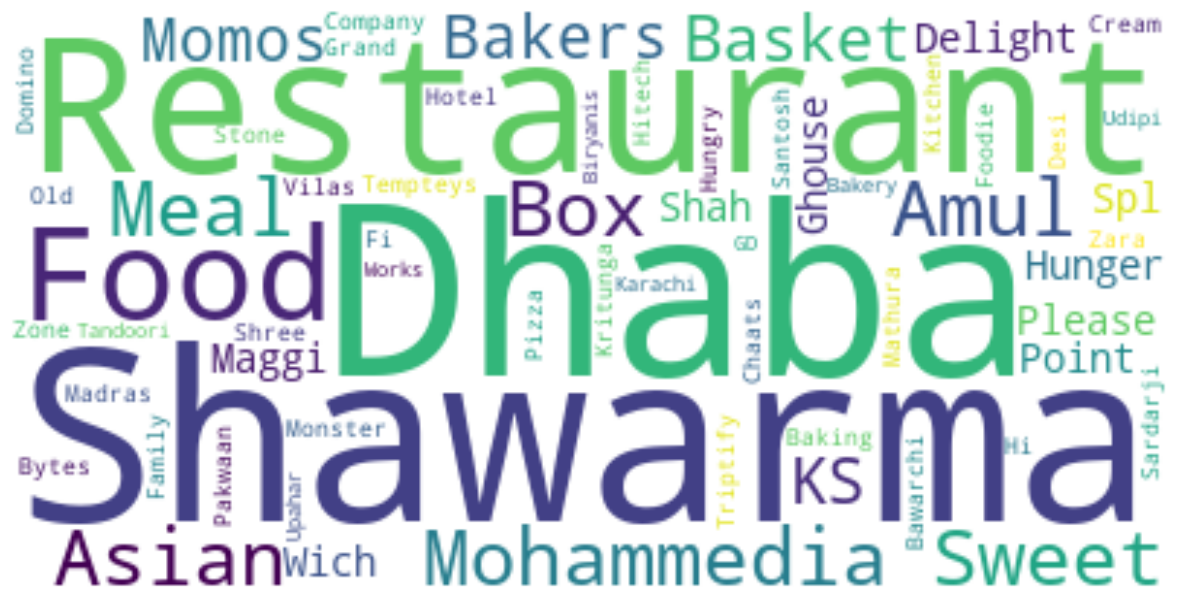

In [52]:
plt.figure(figsize=(15,8))
text = " ".join(name for name in hotel.sort_values('Cost',ascending=True).Restaurant[:30])

# Creating word_cloud with text as argument in .generate() method
wordcloud = WordCloud(background_color="white").generate(text)
# Display the generated Word Cloud
plt.imshow(wordcloud, interpolation='bilinear');
plt.axis("off")

In [132]:
# Convert 'Rating' column to numeric, set errors='coerce' to turn non-numeric values into NaN
review['Rating'] = pd.to_numeric(review['Rating'], errors='coerce')

# Drop rows where 'Rating' is NaN
review = review.dropna(subset=['Rating'])

# Now perform the aggregation
avg_hotel_rating = review.groupby('Restaurant').agg({
    'Rating': 'mean',
    'Reviewer': 'count'
}).reset_index().rename(columns={'Reviewer': 'Total_Review'})

avg_hotel_rating


Restaurant  Rating  Total_Review
0                       10 Downing Street    3.80           100
1                                13 Dhaba    3.48           100
2          3B's - Buddies, Bar & Barbecue    4.76           100
3               AB's - Absolute Barbecues    4.88           100
4                       Absolute Sizzlers    3.62           100
..                                    ...     ...           ...
95             Urban Asia - Kitchen & Bar    3.65           100
96  Yum Yum Tree - The Arabian Food Court    3.56           100
97        Zega - Sheraton Hyderabad Hotel    4.45           100
98               Zing's Northeast Kitchen    3.65           100
99                                eat.fit    3.20           100

[100 rows x 3 columns]

In [123]:
import pandas as pd

# Ensure 'Rating' is numeric, coercing errors to NaN
review['Rating'] = pd.to_numeric(review['Rating'], errors='coerce')

# Optionally, drop rows where 'Rating' is NaN
review = review.dropna(subset=['Rating'])

# Calculate the average rating and count of reviews per restaurant
avg_hotel_rating = review.groupby('Restaurant').agg({'Rating': 'mean', 'Reviewer': 'count'}).reset_index()
avg_hotel_rating.rename(columns={'Rating': 'Average_Rating', 'Reviewer': 'Total_Review'}, inplace=True)

# Display the result
print(avg_hotel_rating)


                               Restaurant  Average_Rating  Total_Review
0                       10 Downing Street            3.80           100
1                                13 Dhaba            3.48           100
2          3B's - Buddies, Bar & Barbecue            4.76           100
3               AB's - Absolute Barbecues            4.88           100
4                       Absolute Sizzlers            3.62           100
..                                    ...             ...           ...
95             Urban Asia - Kitchen & Bar            3.65           100
96  Yum Yum Tree - The Arabian Food Court            3.56           100
97        Zega - Sheraton Hyderabad Hotel            4.45           100
98               Zing's Northeast Kitchen            3.65           100
99                                eat.fit            3.20           100

[100 rows x 3 columns]


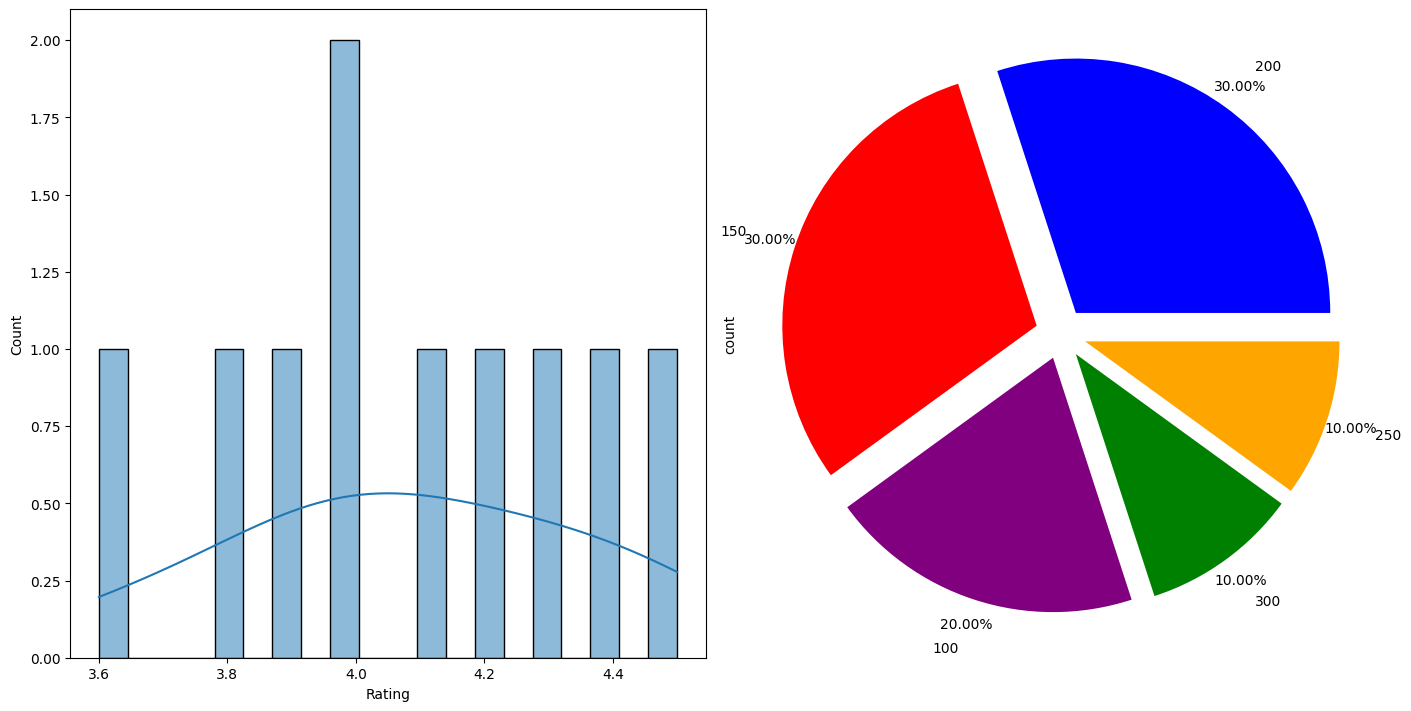

In [130]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Example data, replace with your actual data
avg_hotel_rating = pd.DataFrame({
    'Rating': [4.2, 3.8, 4.5, 4.0, 3.6, 4.1, 3.9, 4.3, 4.4, 4.0],
    'Total_Review': [100, 200, 150, 200, 150, 300, 100, 150, 200, 250]
})

fig, axes = plt.subplots(nrows=1, ncols=2, constrained_layout=True, figsize=(14, 7))

# Histogram of average rating
sns.histplot(data=avg_hotel_rating['Rating'], bins=20, kde=True, ax=axes[0])

# Pie chart of number of reviews for restaurants
review_counts = avg_hotel_rating['Total_Review'].value_counts()
explode_values = [0.1] * len(review_counts)  # Adjust explode length to match the number of unique values

review_counts.plot(
    kind='pie', shadow=False, autopct='%1.2f%%',
    explode=explode_values, pctdistance=1.1, labeldistance=1.2,
    colors=['blue', 'red', 'purple', 'green', 'orange'][:len(review_counts)], ax=axes[1]
)

plt.show()


In [ ]:
#Most popular cuisines
cuisine_list=[]
cuisines=hotel.Cuisines.str.split(',')

#Get all the cuuisines in a list
for i in cuisines:
  for j in i:
    cuisine_list.append(j)

# converting it to dataframe
cuisine_series=pd.Series(cuisine_list)
cuisine_df=pd.DataFrame(cuisine_series,columns=['Cuisines'])
cuisine_df[cuisine_df['Cuisines']==' North Indian']='North Indian'

In [57]:
cuisine_=pd.DataFrame(cuisine_df.groupby(by='Cuisines',as_index=False).value_counts())
cuisine_

Cuisines  count
0       American      2
1         Andhra      3
2        Arabian      1
3          Asian     10
4            BBQ      1
..           ...    ...
64  North Indian     61
65       Seafood      1
66  South Indian      2
67   Street Food      2
68          Thai      1

[69 rows x 2 columns]

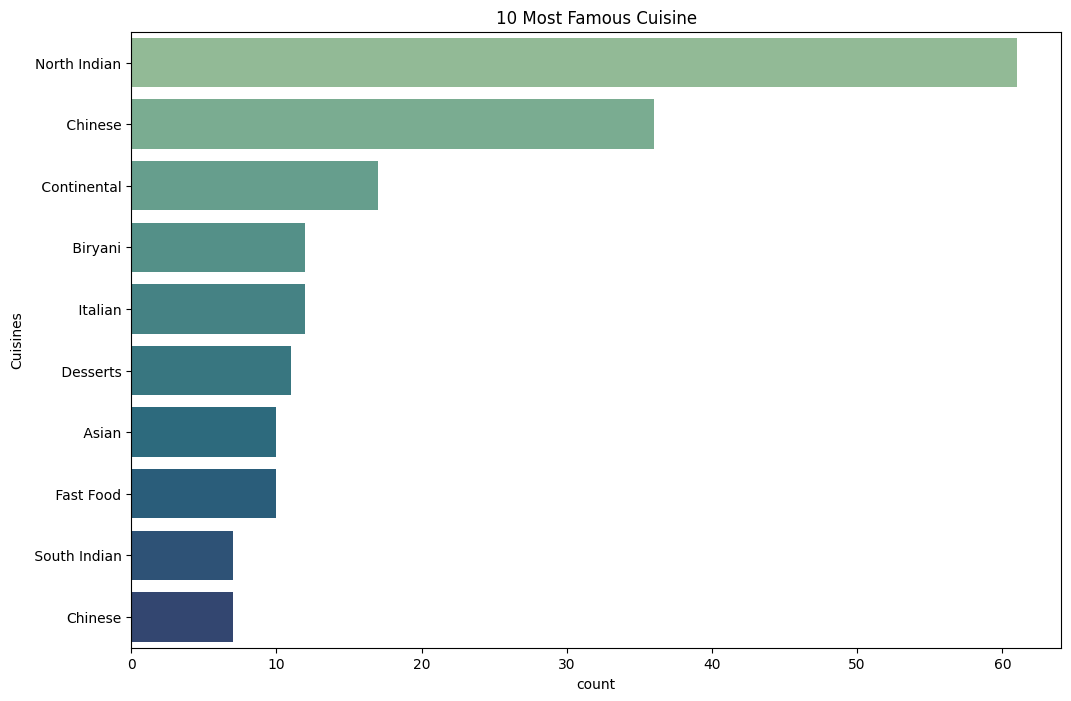

In [58]:
plt.rcParams['figure.figsize']= (12,8)
sns.barplot(x='count', y='Cuisines', data=cuisine_.sort_values(ascending=False, by='count')[:10],palette='crest')
plt.title('10 Most Famous Cuisine')
plt.show()

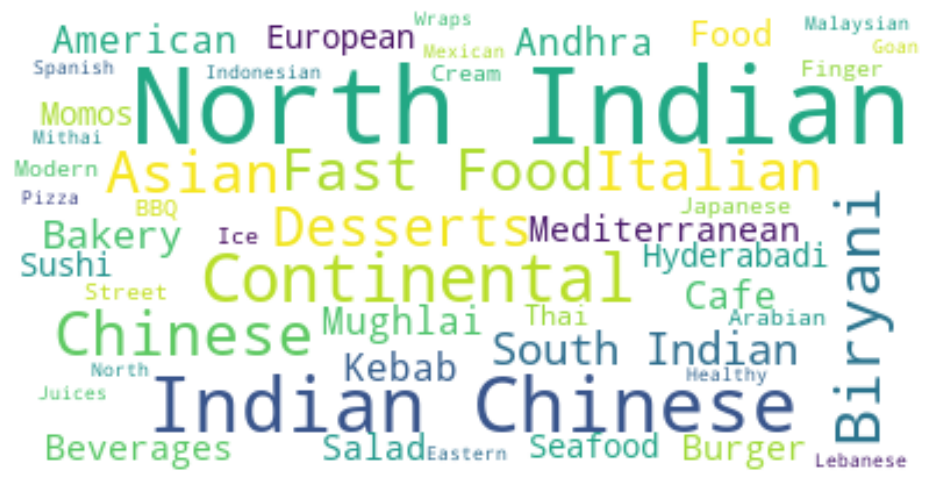

In [59]:
#CREATING WORDCLOUD FOR CUISINES

plt.figure(figsize=(12,10))
df_word_cloud = cuisine_df['Cuisines']
text = " ".join(word for word in df_word_cloud)

# Generate a word cloud image
wordcloud = WordCloud(background_color="white").generate(text)
# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

(-0.5, 1399.5, 1399.5, -0.5)

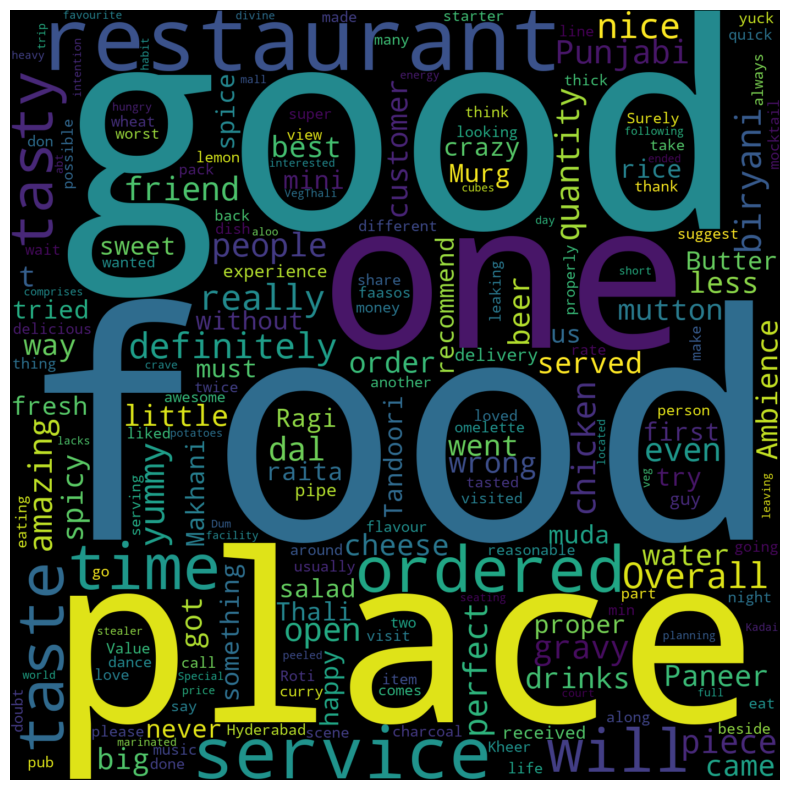

In [60]:
plt.figure(figsize=(15,10))
text = " ".join(name for name in review.sort_values('Review',ascending=False).Review[:30])

# Creating word_cloud with text as argument in .generate() method
word_cloud = WordCloud(width = 1400, height = 1400,collocations = False, background_color = 'black').generate(text)

# Display the generated Word Cloud
plt.imshow(word_cloud, interpolation='bilinear')

plt.axis("off")

In [61]:
top_collections = hotel['Collections'].value_counts().reset_index()
top_collections.rename(columns={'index': 'Collection', 'Collections': 'Count'}, inplace=True)
top_collections

Count  count
0         Food Hygiene Rated Restaurants in Hyderabad      4
1                                       Great Buffets      2
2                                 Hyderabad's Hottest      2
3                                         New on Gold      2
4                                Pan-Asian Delicacies      2
5                                     Veggie Friendly      2
6                                  Trending This Week      2
7   Sunday Brunches, Great Breakfasts, Function Ve...      1
8                 Function Venues, Regional Favorites      1
9                    Veggie Friendly, Terrific Thalis      1
10              Great Buffets, Live Sports Screenings      1
11                               Sneak Peek Hyderabad      1
12  Food Hygiene Rated Restaurants in Hyderabad, C...      1
13                                    Best Milkshakes      1
14  Great Breakfasts, Late Night Restaurants, Best...      1
15  Happy Hours, Top Drinking Destinations, Corpor...      1
16  Sneak Peek Hyderabad, Best Bars & Pubs, Gigs a...      1
17               Happy Hours, Top-Rated, Gold Curated      1
18               Gigs and Events, Corporate Favorites      1
19  Food Hygiene Rated Restaurants in Hyderabad, G...      1
20                                      Best Bakeries      1
21                                 Brilliant Biryanis      1
22                  Great Buffets, Trending This Week      1
23    Mandi, Great Buffets, The ‘Must Visit’ Eateries      1
24                                      Fancy and Fun      1
25             Top-Rated, Gold Curated, Fancy and Fun      1
26                 Great Buffets, Hyderabad's Hottest      1
27                             Late Night Restaurants      1
28  Best Bars & Pubs, Food Hygiene Rated Restauran...      1
29  Sunday Brunches, Corporate Favorites, Great Bu...      1
30  Great Buffets, Live Sports Screenings, Best Ba...      1
31                                    Frozen Delights      1
32      Street Food, Veggie Friendly, Pocket Friendly      1
33                                   Barbecue & Grill      1
34  Corporate Favorites, Happy Hours, Live Sports ...      1
35  Barbecue & Grill, Great Buffets, Corporate Fav...      1
36                     Great Italian, Sunday Brunches      1
37            Live Sports Screenings, Gigs and Events      1
38  Rooftops, Live Sports Screenings, Best Bars & ...      1
39           Barbecue & Grill, Live Sports Screenings      1
40                                             Haleem      1
41                                    Sunday Brunches      1

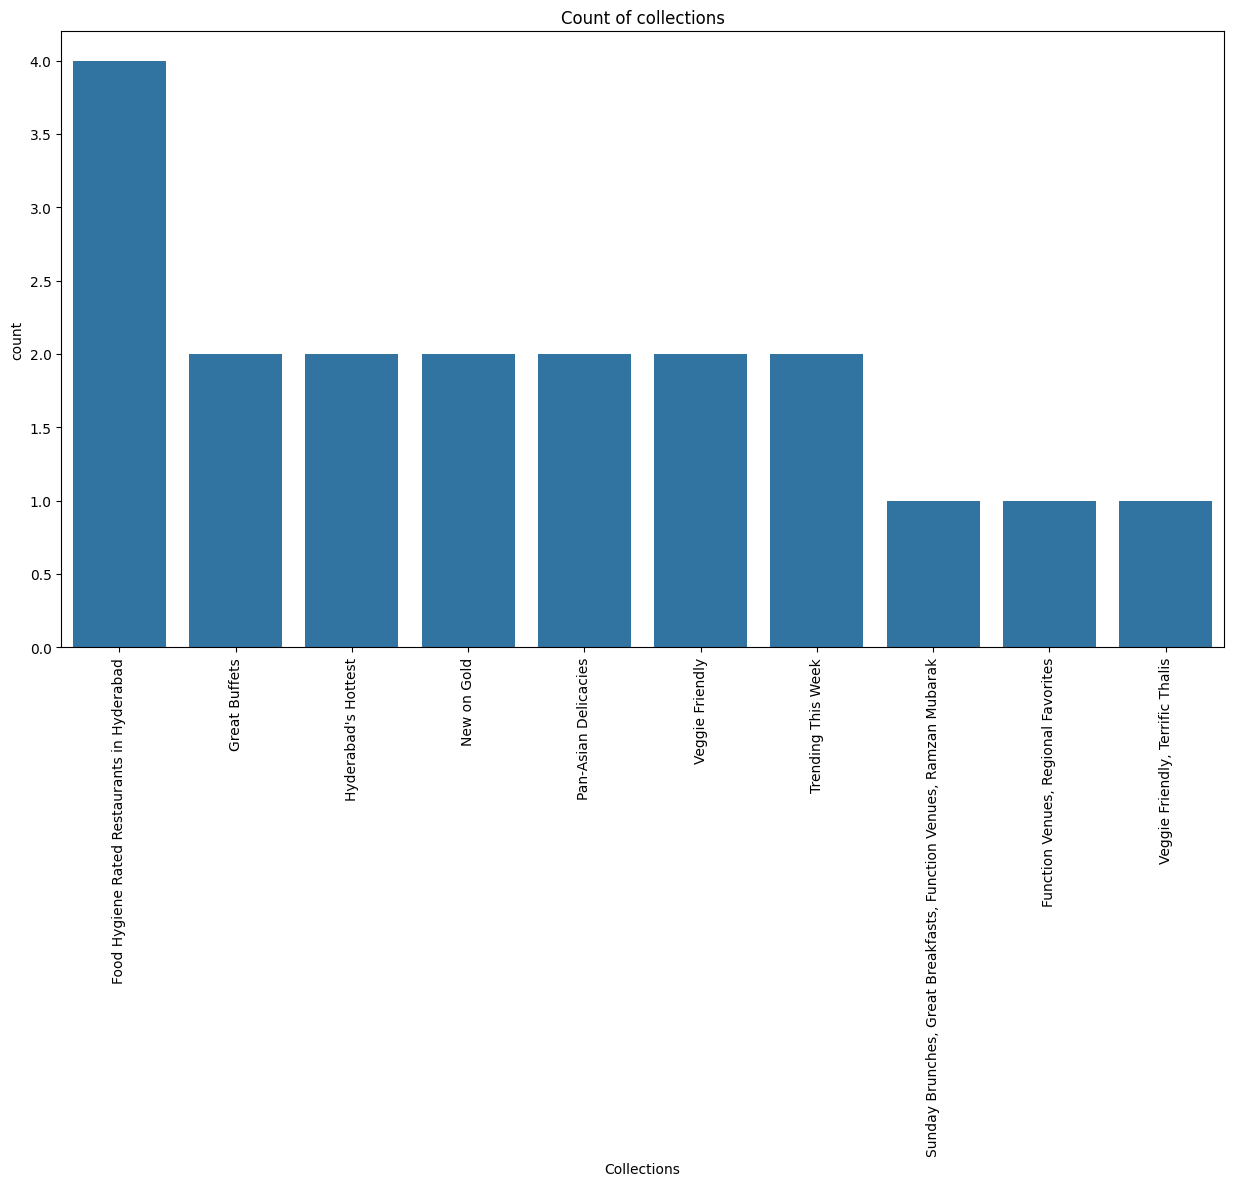

In [62]:
#plot for collection count
plt.figure(figsize = (15,8))
sns.countplot(x='Collections',data=hotel,order=hotel.Collections.value_counts().head(10).index)
plt.title('Count of collections')
plt.xticks(rotation = 90)
plt.show()

In [63]:
num_cols_hotel = ['Cost', 'No_of_cuisine']

#numerical columns for review dataset
num_cols_review = ['Rating', 'Pictures', 'No_of_reviews', 'Followers']

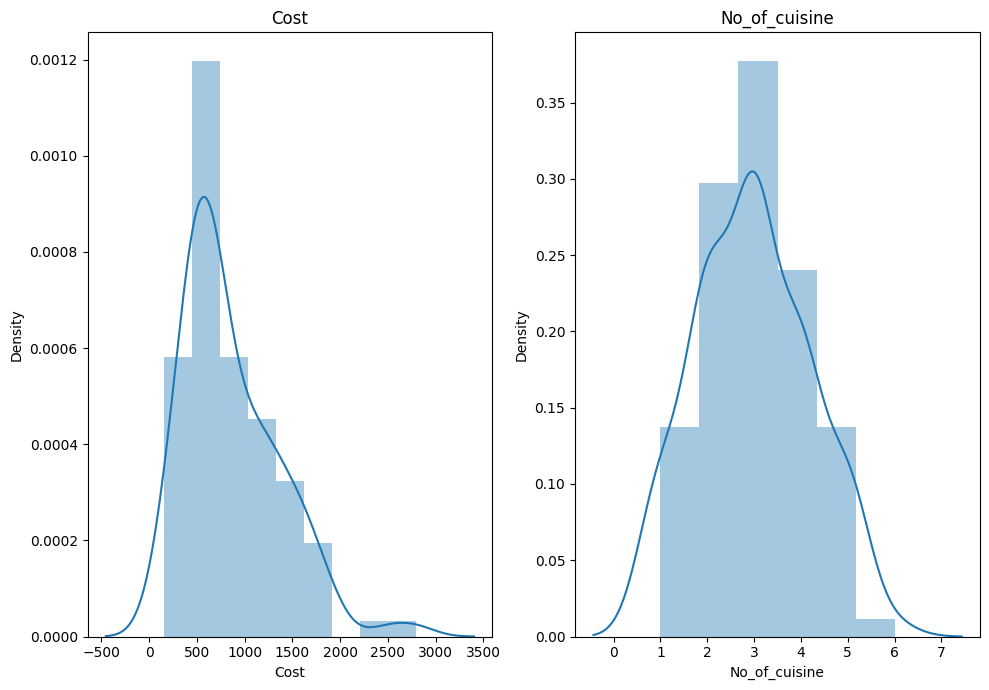

In [64]:
#Distribution plot for hotel dataset
n=1
plt.figure(figsize=(10,7))
for col in num_cols_hotel:
   plt.subplot(1,2,n)
   n+=1
   sns.distplot(hotel[col])
   plt.title(col)
   plt.tight_layout()
  # plt.show()

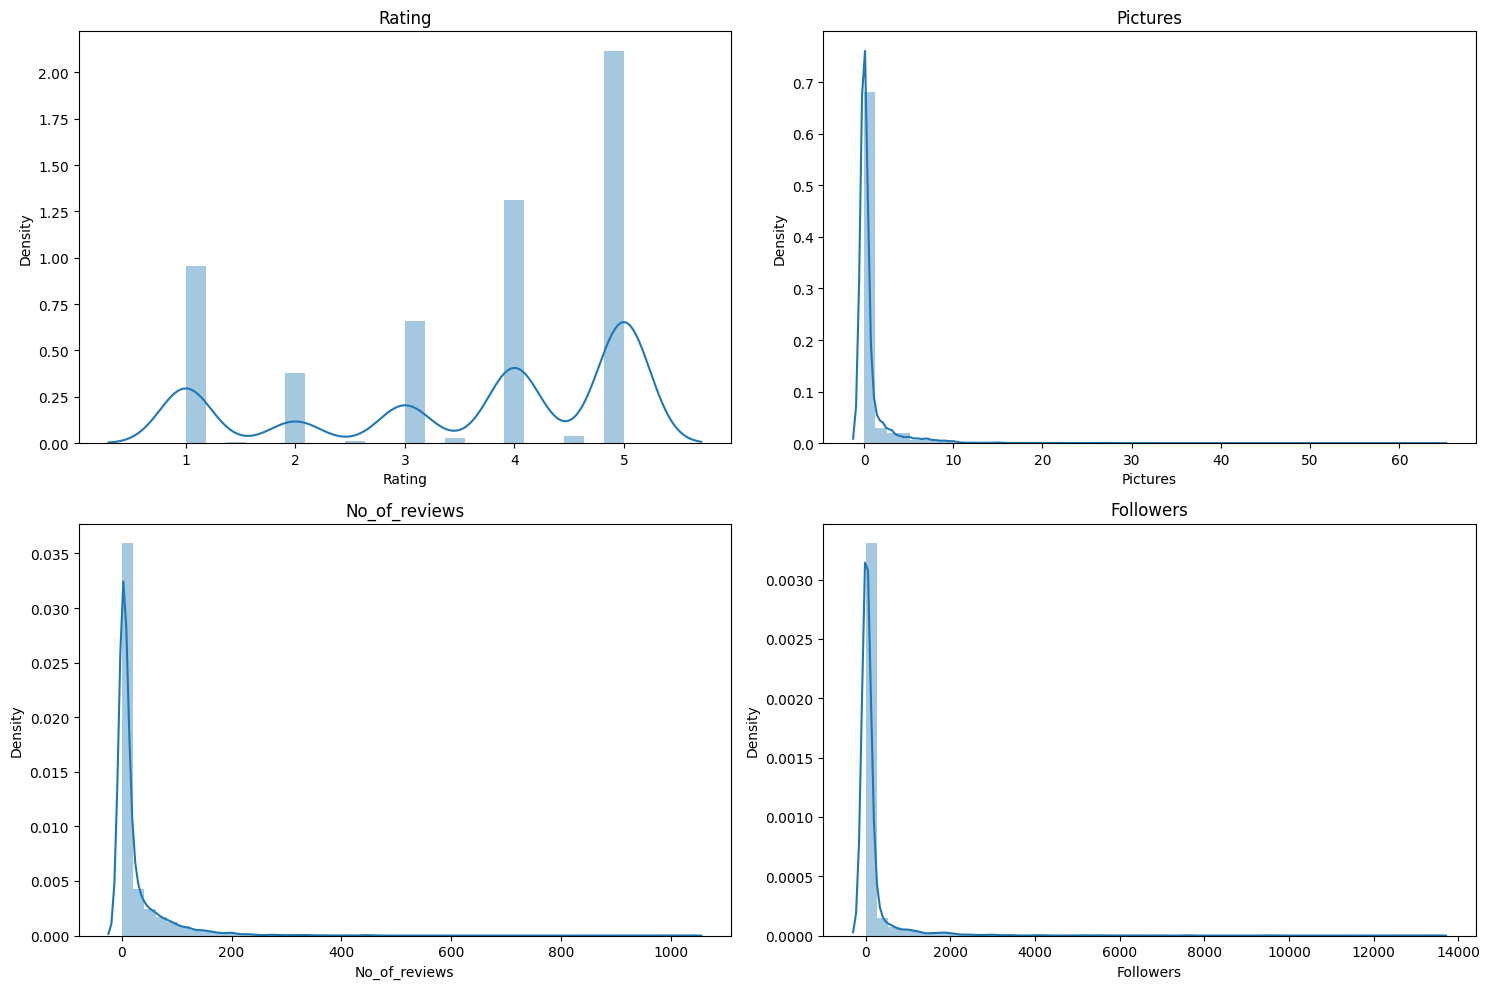

In [133]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Verify and filter out non-numeric columns
num_cols_review = [col for col in review.select_dtypes(include=[np.number]).columns]

# Plot distributions
n = 1
plt.figure(figsize=(15, 10))
for col in num_cols_review:
    plt.subplot(2, 2, n)
    n += 1
    sns.distplot(review[col].dropna())  # Drop NaN values if they exist
    plt.title(col)
    plt.tight_layout()
plt.show()


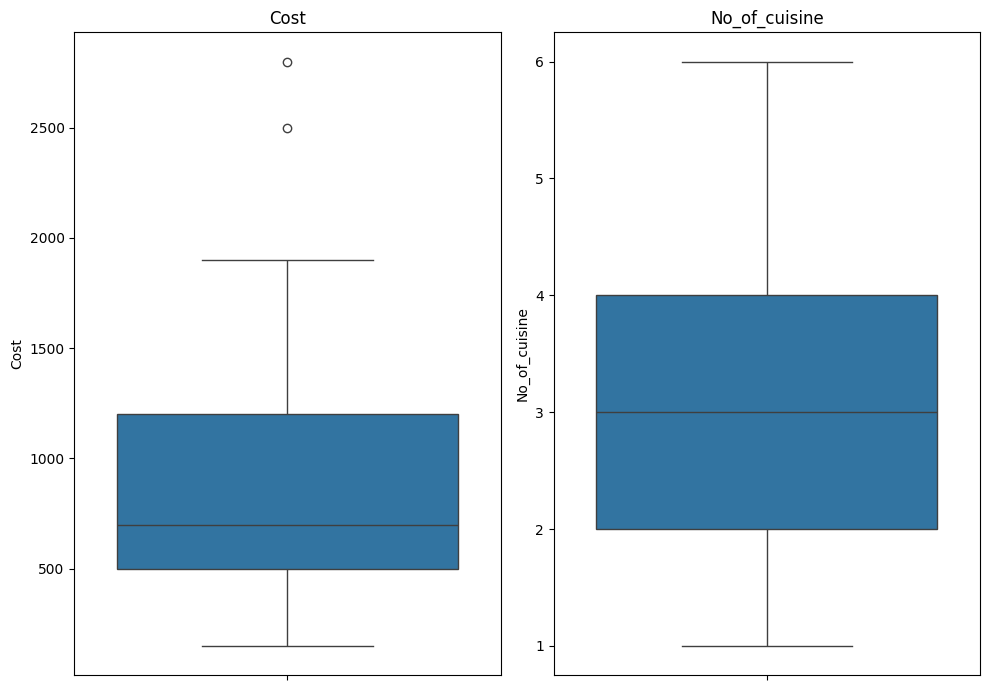

In [66]:
# boxplot plot for hotel dataset
n=1
plt.figure(figsize = (10,7))
for col in num_cols_hotel:
   plt.subplot(1,2,n)
   n+=1
   sns.boxplot(hotel[col])
   plt.title(col)
   plt.tight_layout()
  # plt.show()

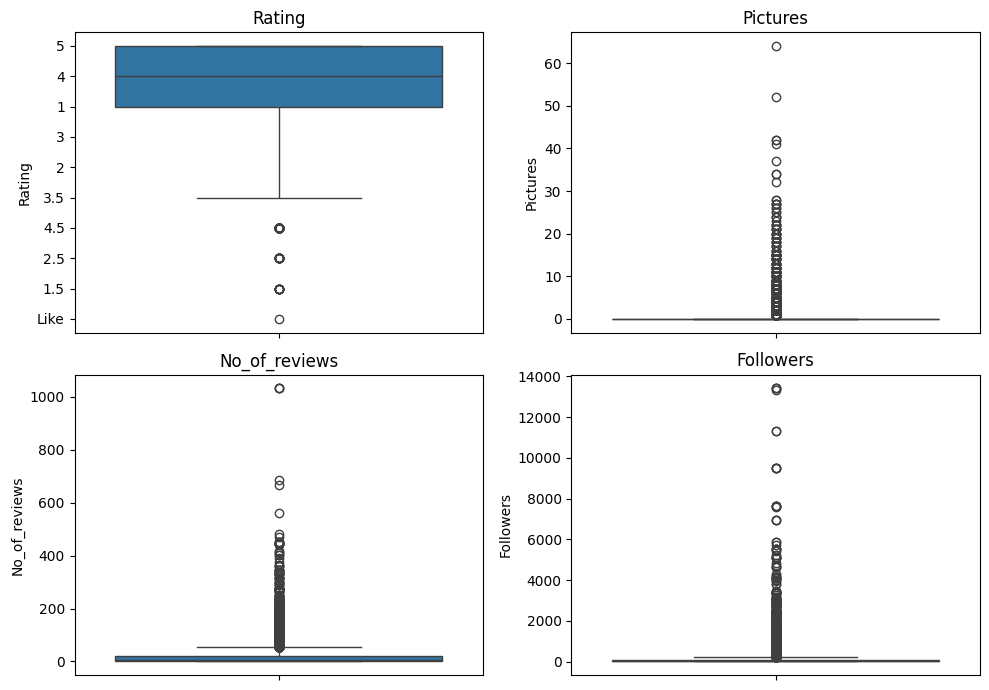

In [67]:
n=1
plt.figure(figsize = (10,7))
for col in num_cols_review:
   plt.subplot(2,2,n)
   n+=1
   sns.boxplot(review[col])
   plt.title(col)
   plt.tight_layout()
  # plt.show()

In [71]:
res_review=review[['Restaurant', 'No_of_reviews']].sort_values(by = 'No_of_reviews', ascending = False).head(20).reset_index(drop=True)
res_review

Restaurant  No_of_reviews
0                                   Labonel         1031.0
1      Collage - Hyatt Hyderabad Gachibowli         1031.0
2                               Pista House         1031.0
3                               Owm Nom Nom          685.0
4             The Old Madras Baking Company          665.0
5                              Aromas@11SIX          560.0
6                         Hyderabadi Daawat          482.0
7                          Chinese Pavilion          472.0
8   Cascade - Radisson Hyderabad Hitec City          452.0
9                                  Tempteys          452.0
10            The Old Madras Baking Company          452.0
11                 Shah Ghouse Spl Shawarma          443.0
12                                KS Bakers          443.0
13                              Pista House          443.0
14                          Diners Pavilion          443.0
15                                  T Grill          443.0
16                            Momos Delight          443.0
17  Cascade - Radisson Hyderabad Hitec City          417.0
18  Cascade - Radisson Hyderabad Hitec City          414.0
19                             Karachi Cafe          411.0

[Text(0, 0, '1031')]

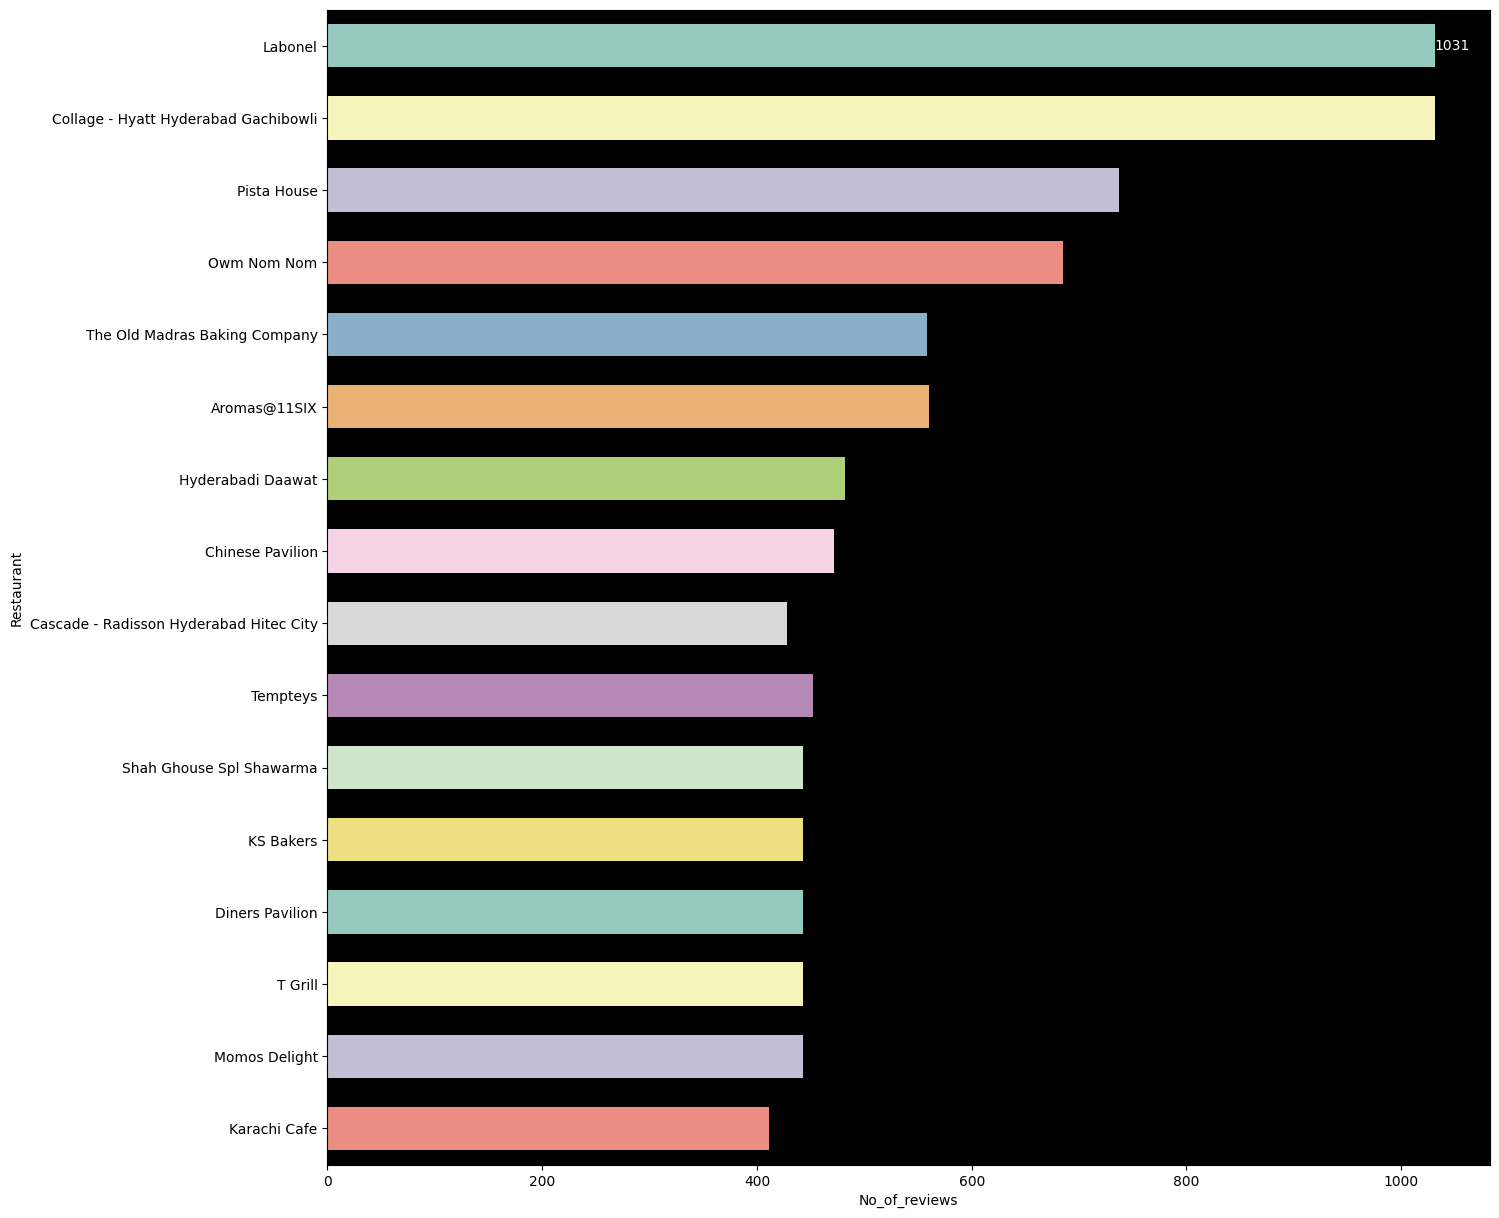

In [72]:
# No of reviews for each restaurant
plt.figure(figsize = (15,15))
ax = sns.barplot(x = 'No_of_reviews',y = 'Restaurant',data = res_review ,palette = 'Set3',errwidth = 0, width = 0.6)
ax.set_facecolor("black")
ax.bar_label(ax.containers[0], color = 'White')

In [73]:
pic_count=pd.DataFrame(review[['Restaurant', 'Pictures']]
                       .groupby(by='Restaurant',as_index=False)['Pictures'].sum()
                       .sort_values(by='Pictures',ascending=False).reset_index(drop=True))

# Top 10 restaurants with highest number of pictures posted
pic_count_top10=pic_count.head(10)
pic_count_top10

Restaurant  Pictures
0                                         PourHouse7       356
1                                       Arena Eleven       280
2                               Marsala Food Company       276
3                                  Hyderabadi Daawat       234
4                                American Wild Wings       218
5                                        Driven Cafe       212
6                                   Chinese Pavilion       201
7                         Urban Asia - Kitchen & Bar       178
8               Collage - Hyatt Hyderabad Gachibowli       173
9  Jonathan's Kitchen - Holiday Inn Express & Suites       163

In [74]:
pic_count_bottom10=pic_count.tail(10)
pic_count_bottom10

Restaurant  Pictures
90                           Aromas@11SIX         5
91                       Hotel Zara Hi-Fi         5
92                               Delhi-39         4
93                    Mohammedia Shawarma         4
94                         Domino's Pizza         4
95                           Being Hungry         3
96                        Hyderabad Chefs         2
97                               Paradise         2
98  Shree Santosh Dhaba Family Restaurant         2
99              Hitech Bawarchi Food Zone         1

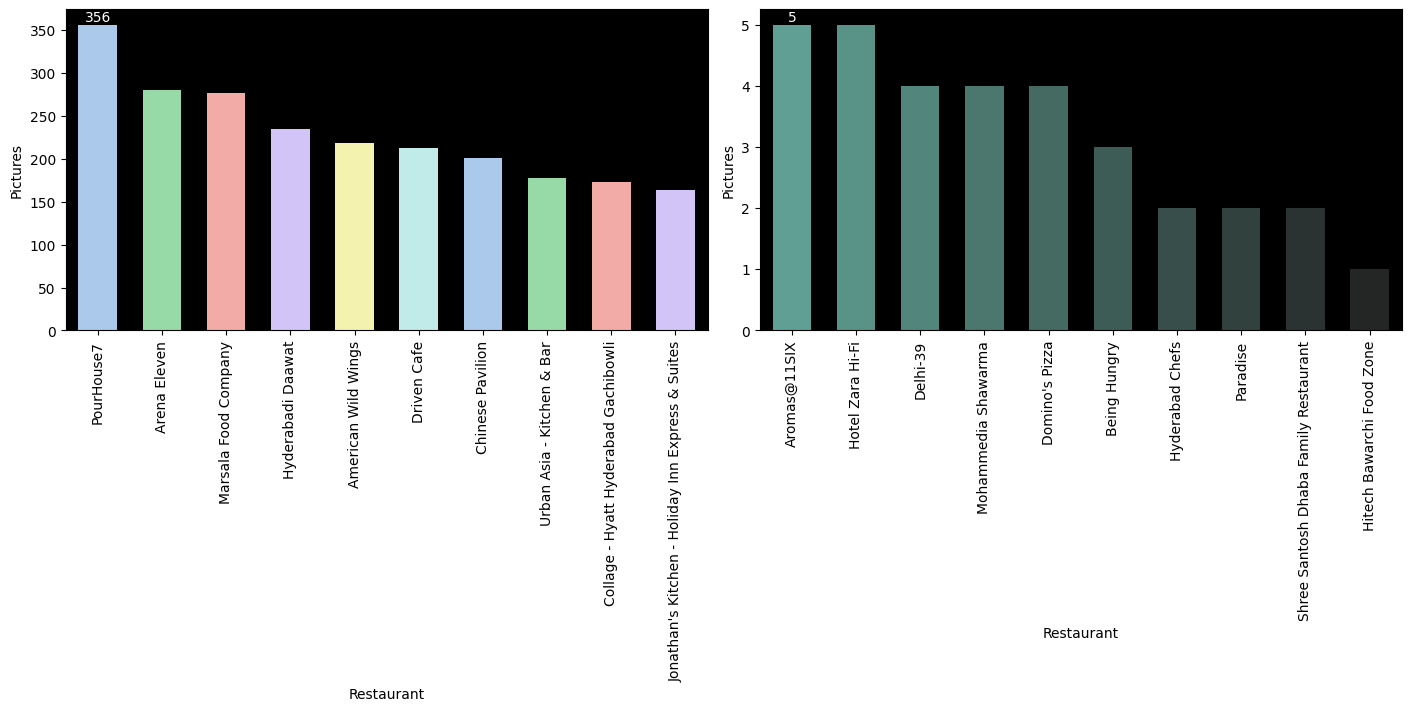

In [75]:
fig,axes=plt.subplots(nrows=1,ncols=2,constrained_layout=True,figsize=(14,7))

# Visualization of top 10 restaurants with highest number of pictures posted
a = sns.barplot(x = 'Restaurant',y = 'Pictures',data = pic_count_top10 ,palette = "pastel6",errwidth=0, width=0.6,ax=axes[0])
a.set_facecolor("black")
a.bar_label(a.containers[0], color= 'White')
a.set_xticklabels(labels=pic_count_top10['Restaurant'].to_list(),rotation=90)
a.set_facecolor("black")

# Visualization of bottom 10 restaurants with lowest number of pictures posted
b = sns.barplot(x = 'Restaurant',y = 'Pictures',data = pic_count_bottom10 ,palette = 'dark:#5A9_r',errwidth=0, width=0.6,ax=axes[1])
b.set_facecolor("black")
b.bar_label(b.containers[0], color= 'White')
b.set_xticklabels(labels=pic_count_bottom10['Restaurant'].to_list(),rotation=90)
b.set_facecolor("black")

In [76]:
# TOTAL Followers of reviewers FOR THE PARTICULAR RESTAURANT
follower_count=pd.DataFrame(review[['Restaurant', 'Followers']]
                       .groupby(by='Restaurant',as_index=False)['Followers'].sum()
                       .sort_values(by='Followers',ascending=False).reset_index(drop=True))

# Restaurants with highest number of reviewer followers
follower_count_top10=follower_count.head(10)
follower_count_top10

Restaurant  Followers
0                              Pista House    51068.0
1  Komatose - Holiday Inn Express & Suites    46229.0
2                        Hyderabadi Daawat    45375.0
3                    The Tilt Bar Republic    42126.0
4                           Dunkin' Donuts    37667.0
5                         Chinese Pavilion    35426.0
6                                   Faasos    34640.0
7                                  T Grill    32222.0
8  Cascade - Radisson Hyderabad Hitec City    31644.0
9                          Barbeque Nation    30866.0

In [77]:

# Restaurants with lowest number of reviewer followers
follower_count_bottom10=follower_count.tail(10)
follower_count_bottom10

Restaurant  Followers
90                               Flechazo     2748.0
91                    Kritunga Restaurant     2223.0
92                       Hotel Zara Hi-Fi     1818.0
93         3B's - Buddies, Bar & Barbecue     1676.0
94                 Royal Spicy Restaurant     1497.0
95                               Delhi-39     1222.0
96              AB's - Absolute Barbecues     1060.0
97                               Paradise      798.0
98                    Mohammedia Shawarma      791.0
99  Shree Santosh Dhaba Family Restaurant      562.0

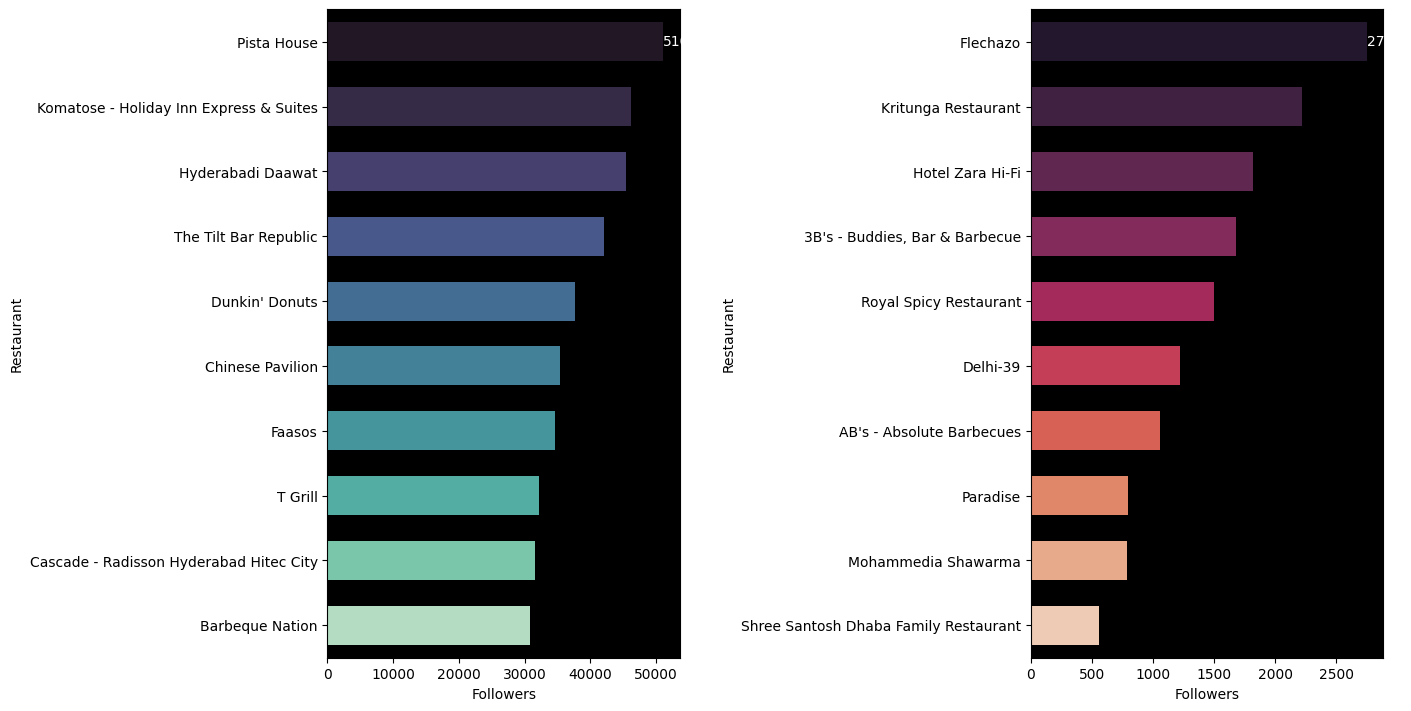

In [78]:
fig,axes=plt.subplots(nrows=1,ncols=2,constrained_layout=True,figsize=(14,7))

# Visualization of top 10 restaurants with highest number of followers
a = sns.barplot(x = 'Followers',y = 'Restaurant',data = follower_count_top10 ,palette = "mako",errwidth=0, width=0.6,ax=axes[0])
a.set_facecolor("black")
a.bar_label(a.containers[0], color= 'White')
a.set_yticklabels(labels=follower_count_top10['Restaurant'].to_list())
a.set_facecolor("black")

# Visualization of bottom 10 restaurants with lowest number of followers
b = sns.barplot(x = 'Followers',y = 'Restaurant',data = follower_count_bottom10 ,palette = 'rocket',errwidth=0, width=0.6,ax=axes[1])
b.set_facecolor("black")
b.bar_label(b.containers[0], color= 'White')
b.set_yticklabels(labels=follower_count_bottom10['Restaurant'].to_list())
b.set_facecolor("black")

In [140]:
sns.barplot(x='Average_rating', y='Restaurant', data=hotel.sort_values(ascending=False, by='Average_rating')[:10],palette ='coolwarm' )
plt.title('10 Most Rated Restaurant')

plt.show()

KeyError: 'Average_rating'

In [53]:
# Group by 'Restaurant' and calculate the average rating
avg_ratings = review_df.groupby('Restaurant')['Rating'].mean().reset_index()

# Rename the column for clarity
avg_ratings.rename(columns={'Rating': 'Average_rating'}, inplace=True)

# Display the result
print(avg_ratings.head())


                       Restaurant  Average_rating
0               10 Downing Street            3.80
1                        13 Dhaba            3.48
2  3B's - Buddies, Bar & Barbecue            4.76
3       AB's - Absolute Barbecues            4.88
4               Absolute Sizzlers            3.62


In [54]:
# Sort by 'Average_rating' in descending order
top_rated_restaurants = avg_ratings.sort_values(by='Average_rating', ascending=False).head(10)

# Display the top-rated restaurants
print(top_rated_restaurants)


                                 Restaurant  Average_rating
3                 AB's - Absolute Barbecues            4.88
11                                   B-Dubs            4.81
2            3B's - Buddies, Bar & Barbecue            4.76
67                                 Paradise            4.70
35                                 Flechazo            4.66
87                           The Indi Grill            4.60
97          Zega - Sheraton Hyderabad Hotel            4.45
64               Over The Moon Brew Company            4.34
16                          Beyond Flavours            4.28
19  Cascade - Radisson Hyderabad Hitec City            4.26


In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Replace 'your_dataset_path' with the actual file path of your reviews dataset
review_df = pd.read_csv('/Users/kiit/Downloads/Zomato Restaurant reviews.csv')

# Ensure the 'Rating' column is numeric and handle missing values
review_df['Rating'] = pd.to_numeric(review_df['Rating'], errors='coerce')
review_df.dropna(subset=['Rating'], inplace=True)


In [7]:
# Calculate average ratings per restaurant
avg_ratings = review_df.groupby('Restaurant')['Rating'].mean().reset_index()
avg_ratings.rename(columns={'Rating': 'Average_rating'}, inplace=True)


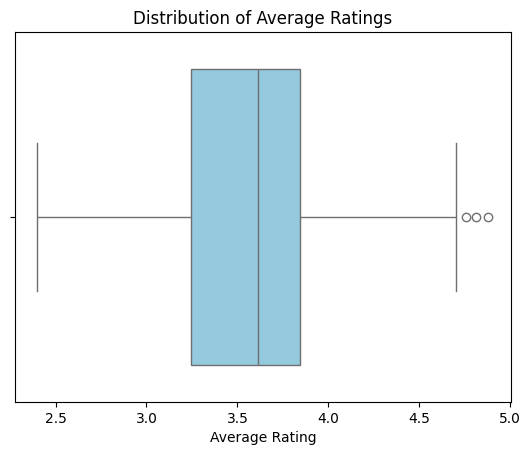

In [8]:
# Create the boxplot
sns.boxplot(x=avg_ratings['Average_rating'], color='skyblue')
plt.title('Distribution of Average Ratings')
plt.xlabel('Average Rating')
plt.show()


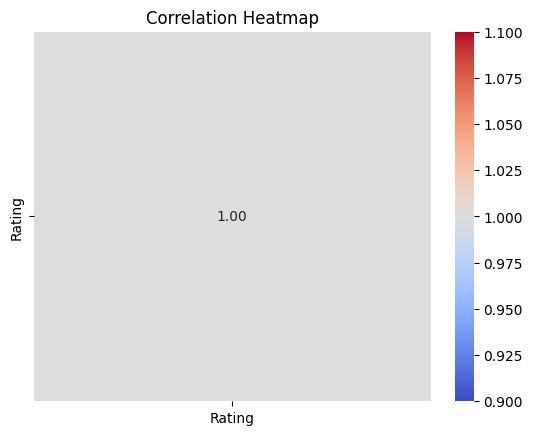

In [9]:
# Compute the correlation matrix
correlation_matrix = review_df[['Rating']].corr()  # Add more numerical columns if applicable

# Plot the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()


C:\Users\kiit\AppData\Local\Temp\ipykernel_320\1034322867.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='Restaurant', x='Average_rating', data=top_restaurants, palette='viridis')


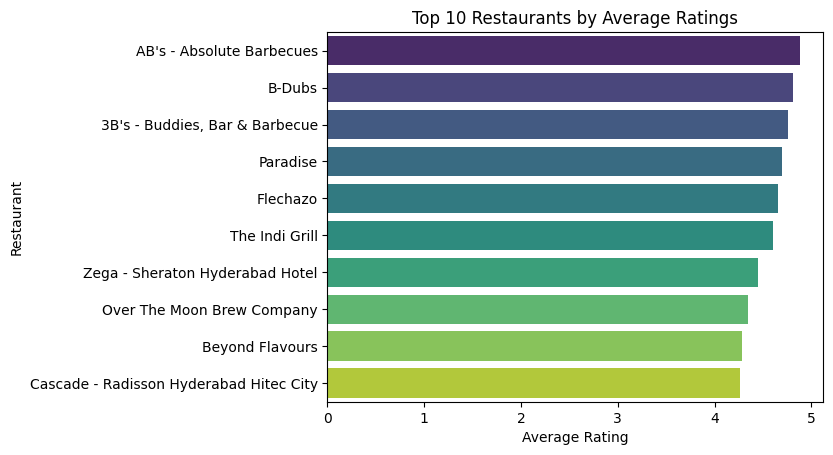

In [10]:
# Sort the top 10 restaurants by average ratings
top_restaurants = avg_ratings.sort_values(by='Average_rating', ascending=False).head(10)

# Plot the barplot
sns.barplot(y='Restaurant', x='Average_rating', data=top_restaurants, palette='viridis')
plt.title('Top 10 Restaurants by Average Ratings')
plt.xlabel('Average Rating')
plt.ylabel('Restaurant')
plt.show()


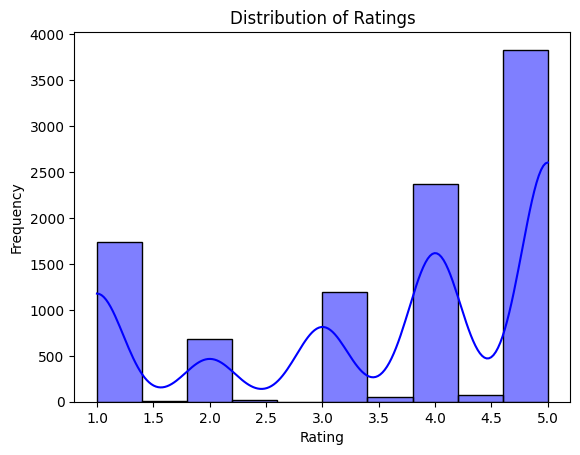

In [11]:
# Plot histogram for the ratings
sns.histplot(review_df['Rating'], bins=10, kde=True, color='blue')
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()


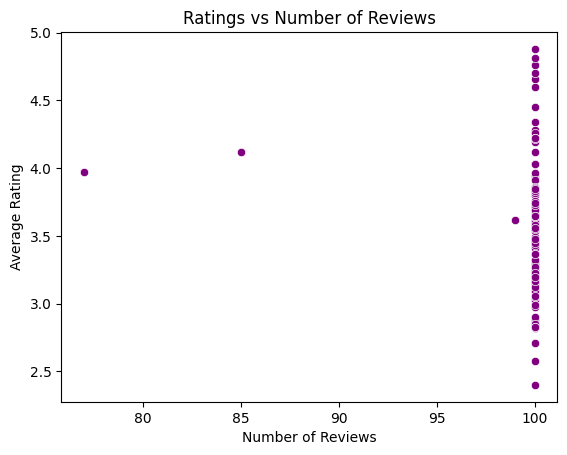

In [13]:
# Add a 'Review_Count' column
review_count = review_df.groupby('Restaurant')['Reviewer'].count().reset_index()
review_count.rename(columns={'Reviewer': 'Review_Count'}, inplace=True)
scatter_data = pd.merge(avg_ratings, review_count, on='Restaurant')

# Scatterplot
sns.scatterplot(x='Review_Count', y='Average_rating', data=scatter_data, color='purple')
plt.title('Ratings vs Number of Reviews')
plt.xlabel('Number of Reviews')
plt.ylabel('Average Rating')
plt.show()



In [14]:
print(review_df.columns)


Index(['Restaurant', 'Reviewer', 'Review', 'Rating', 'Metadata', 'Time',
       'Pictures'],
      dtype='object')


In [16]:
# Assuming 'Rating' column exists in review_df
review_df['Sentiment'] = review_df['Rating'].apply(lambda x: 'Positive' if x > 3 else ('Negative' if x < 3 else 'Neutral'))


C:\Users\kiit\AppData\Local\Temp\ipykernel_320\200345827.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Sentiment', data=review_df, palette='Set2')


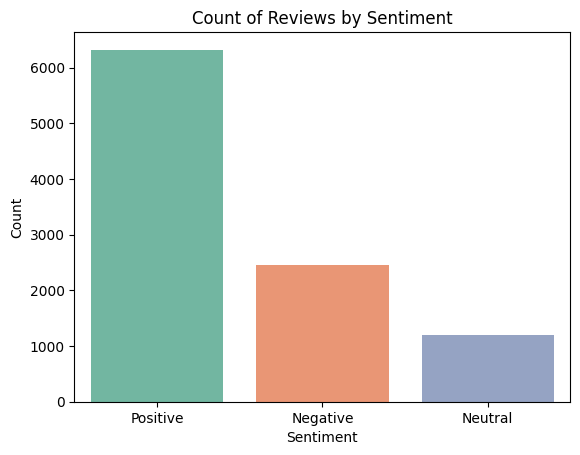

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# Countplot for Sentiment
sns.countplot(x='Sentiment', data=review_df, palette='Set2')
plt.title('Count of Reviews by Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()


In [3]:
#Sentiment analysis
import pandas as pd

# Replace the file path with your actual dataset path
review_df = pd.read_csv('/Users/kiit/Downloads/Zomato Restaurant reviews.csv')


In [ ]:
def categorize_sentiment(rating):
    rating = float(rating)  # Convert to float to handle numeric operations
    if rating >= 4:
        return 'Positive'
    elif rating == 3:
        return 'Neutral'
    else:
        return 'Negative'

review_df['Sentiment'] = review_df['Rating'].apply(categorize_sentiment)


In [7]:
import pandas as pd

In [9]:
hotel = pd.read_csv('/Users/kiit/Downloads/Zomato Restaurant names and Metadata.csv')
review_df = pd.read_csv('/Users/kiit/Downloads/Zomato Restaurant reviews.csv')


In [10]:
print(review_df['Rating'].unique())

['5' '4' '1' '3' '2' '3.5' '4.5' '2.5' '1.5' 'Like' nan]


In [11]:
review_df['Rating'] = pd.to_numeric(review_df['Rating'], errors='coerce')


In [12]:
review_df.dropna(subset=['Rating'], inplace=True)

In [13]:
def categorize_sentiment(rating):
    if rating >= 4.0:
        return 'Positive'
    elif rating >= 2.0:
        return 'Neutral'
    else:
        return 'Negative'

In [14]:
review_df['Sentiment'] = review_df['Rating'].apply(categorize_sentiment)

In [15]:
print(review_df[['Rating', 'Sentiment']].head())

   Rating Sentiment
0     5.0  Positive
1     5.0  Positive
2     5.0  Positive
3     5.0  Positive
4     5.0  Positive


In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

In [17]:
sentiment_counts = review_df['Sentiment'].value_counts()

C:\Users\kiit\AppData\Local\Temp\ipykernel_30700\454095716.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette="viridis")


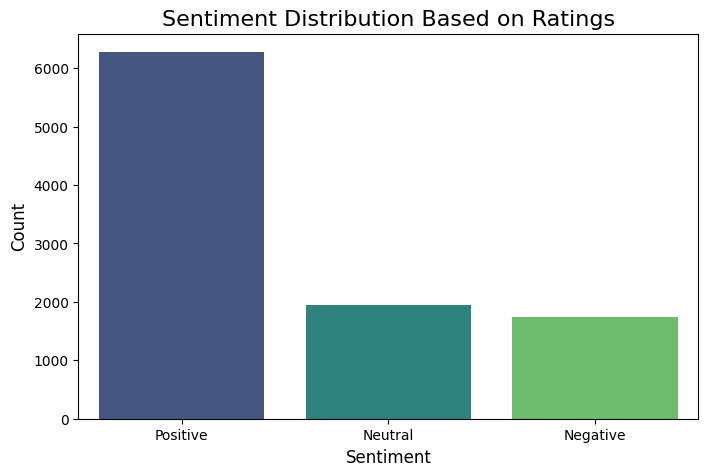

In [18]:
plt.figure(figsize=(8, 5))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette="viridis")
plt.title("Sentiment Distribution Based on Ratings", fontsize=16)
plt.xlabel("Sentiment", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.show()

In [20]:
print(review_df.columns)
print(hotel.columns)


Index(['Restaurant', 'Reviewer', 'Review', 'Rating', 'Metadata', 'Time',
       'Pictures', 'Sentiment'],
      dtype='object')
Index(['Name', 'Links', 'Cost', 'Collections', 'Cuisines', 'Timings'], dtype='object')


In [22]:
# Merge review_df with hotel on 'Restaurant' (from review_df) and 'Name' (from hotel)
merged_df = pd.merge(review_df, hotel, left_on='Restaurant', right_on='Name', how='inner')

# Display the first few rows of the merged dataframe
print(merged_df.head())


        Restaurant              Reviewer  \
0  Beyond Flavours     Rusha Chakraborty   
1  Beyond Flavours  Anusha Tirumalaneedi   
2  Beyond Flavours       Ashok Shekhawat   
3  Beyond Flavours        Swapnil Sarkar   
4  Beyond Flavours                Dileep   

                                              Review  Rating  \
0  The ambience was good, food was quite good . h...     5.0   
1  Ambience is too good for a pleasant evening. S...     5.0   
2  A must try.. great food great ambience. Thnx f...     5.0   
3  Soumen das and Arun was a great guy. Only beca...     5.0   
4  Food is good.we ordered Kodi drumsticks and ba...     5.0   

                  Metadata             Time  Pictures Sentiment  \
0   1 Review , 2 Followers  5/25/2019 15:54         0  Positive   
1  3 Reviews , 2 Followers  5/25/2019 14:20         0  Positive   
2  2 Reviews , 3 Followers  5/24/2019 22:54         0  Positive   
3    1 Review , 1 Follower  5/24/2019 22:11         0  Positive   
4  3 Reviews , 

In [25]:
sentiment_by_hotel = merged_df.groupby('Restaurant')['Sentiment'].value_counts().unstack(fill_value=0)

In [26]:
top_positive = sentiment_by_hotel.sort_values('Positive', ascending=False).head()
print(top_positive)

Sentiment                       Negative  Neutral  Positive
Restaurant                                                 
AB's - Absolute Barbecues              0        3        97
Paradise                               3        1        96
B-Dubs                                 1        3        96
3B's - Buddies, Bar & Barbecue         2        5        93
The Indi Grill                         0        8        92


In [27]:
review_df['Time'] = pd.to_datetime(review_df['Time'], errors='coerce')


In [28]:
review_df['Month'] = review_df['Time'].dt.to_period('M')
sentiment_trends = review_df.groupby('Month')['Sentiment'].value_counts().unstack(fill_value=0)


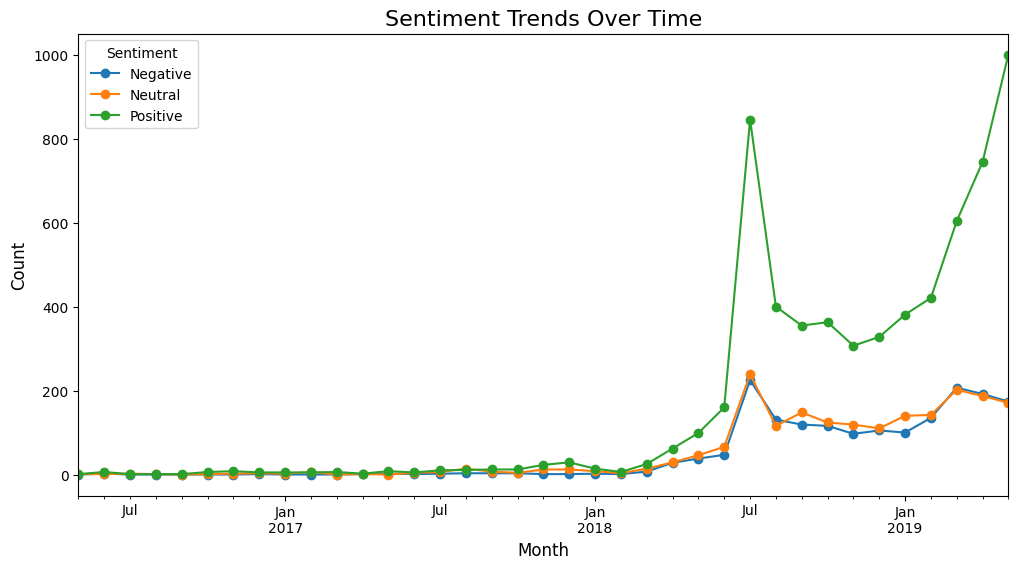

In [29]:
# Plot sentiment trends
sentiment_trends.plot(kind='line', figsize=(12, 6), marker='o')
plt.title("Sentiment Trends Over Time", fontsize=16)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.legend(title="Sentiment")
plt.show()

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

In [31]:
sentiment_by_restaurant = merged_df.groupby('Restaurant')['Sentiment'].value_counts().unstack(fill_value=0)


In [33]:
sentiment_by_restaurant['Total'] = sentiment_by_restaurant.sum(axis=1)
sentiment_by_restaurant = sentiment_by_restaurant.sort_values('Total', ascending=False).drop(columns='Total')


In [34]:
# Plot the top 10 restaurants
top_10_restaurants = sentiment_by_restaurant.head(10)


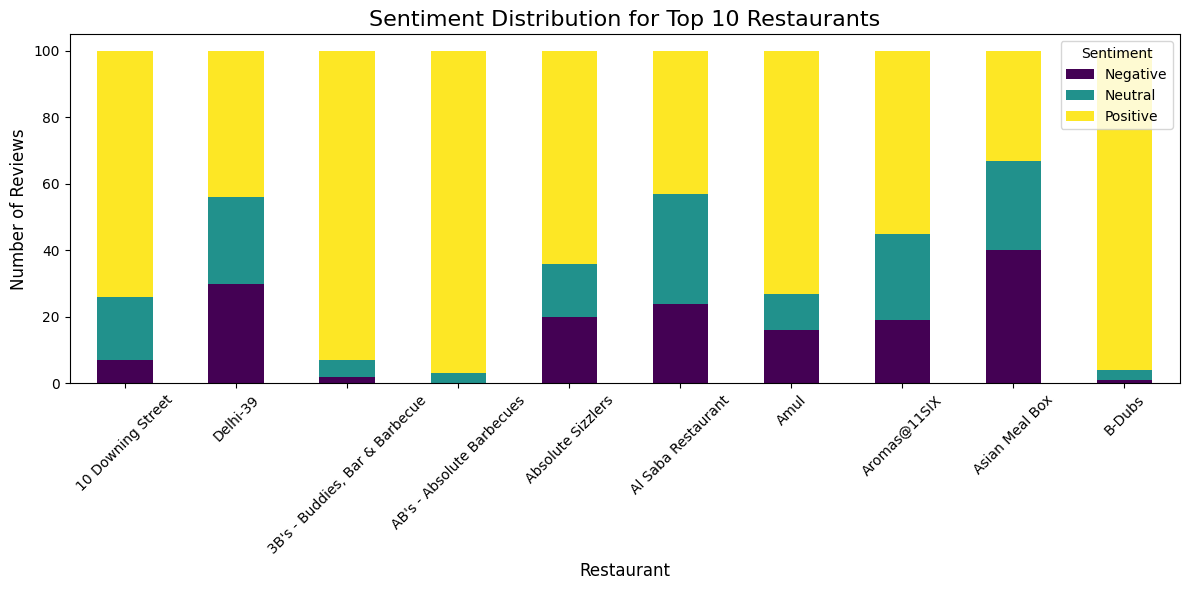

In [35]:
 #Stacked bar plot
top_10_restaurants.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='viridis')
plt.title("Sentiment Distribution for Top 10 Restaurants", fontsize=16)
plt.xlabel("Restaurant", fontsize=12)
plt.ylabel("Number of Reviews", fontsize=12)
plt.legend(title="Sentiment")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

C:\Users\kiit\AppData\Local\Temp\ipykernel_30700\1521449973.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Sentiment', y='Rating', data=review_df, palette='viridis')


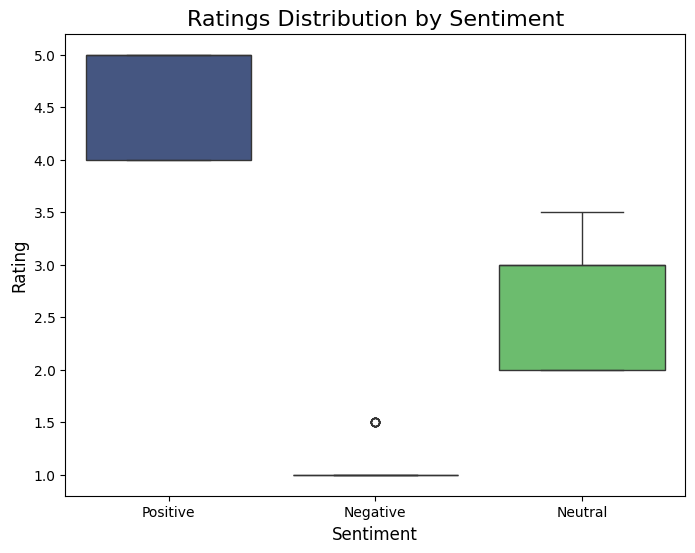

In [36]:
# Boxplot of ratings by sentiment
plt.figure(figsize=(8, 6))
sns.boxplot(x='Sentiment', y='Rating', data=review_df, palette='viridis')
plt.title("Ratings Distribution by Sentiment", fontsize=16)
plt.xlabel("Sentiment", fontsize=12)
plt.ylabel("Rating", fontsize=12)
plt.show()


In [37]:
from wordcloud import WordCloud

# Generate word clouds for positive and negative reviews
positive_reviews = " ".join(merged_df[merged_df['Sentiment'] == 'Positive']['Review'])
negative_reviews = " ".join(merged_df[merged_df['Sentiment'] == 'Negative']['Review'])

# Create word clouds
wordcloud_positive = WordCloud(width=800, height=400, background_color='white').generate(positive_reviews)
wordcloud_negative = WordCloud(width=800, height=400, background_color='black', colormap='Reds').generate(negative_reviews)

# Plot


TypeError: sequence item 1621: expected str instance, float found

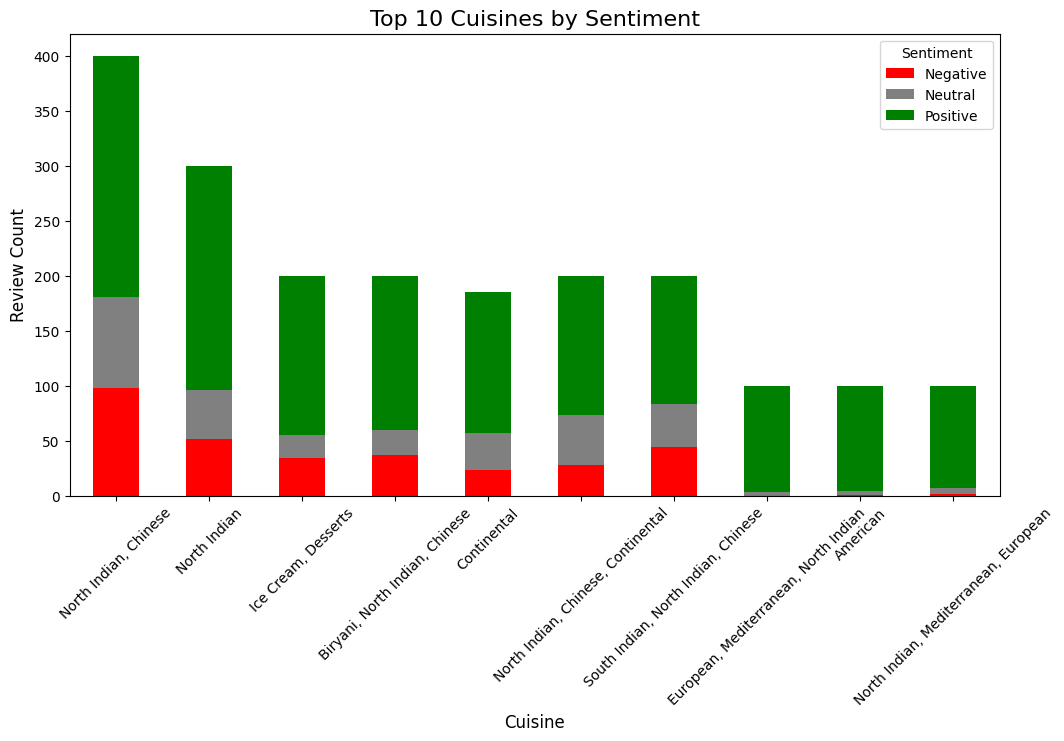

In [38]:
# Split 'Cuisines' into separate rows (if multiple cuisines are listed)
cuisine_sentiment = merged_df.explode('Cuisines')

# Count sentiments by cuisine
cuisine_sentiment_count = cuisine_sentiment.groupby('Cuisines')['Sentiment'].value_counts().unstack(fill_value=0)

# Plot top cuisines by positive reviews
top_cuisines = cuisine_sentiment_count.sort_values('Positive', ascending=False).head(10)
top_cuisines.plot(kind='bar', figsize=(12, 6), stacked=True, color=['red', 'gray', 'green'])
plt.title('Top 10 Cuisines by Sentiment', fontsize=16)
plt.xlabel('Cuisine', fontsize=12)
plt.ylabel('Review Count', fontsize=12)
plt.legend(title="Sentiment")
plt.xticks(rotation=45)
plt.show()


C:\Users\kiit\AppData\Local\Temp\ipykernel_30700\2103794651.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Sentiment', y='Cost', data=merged_df, palette="viridis")


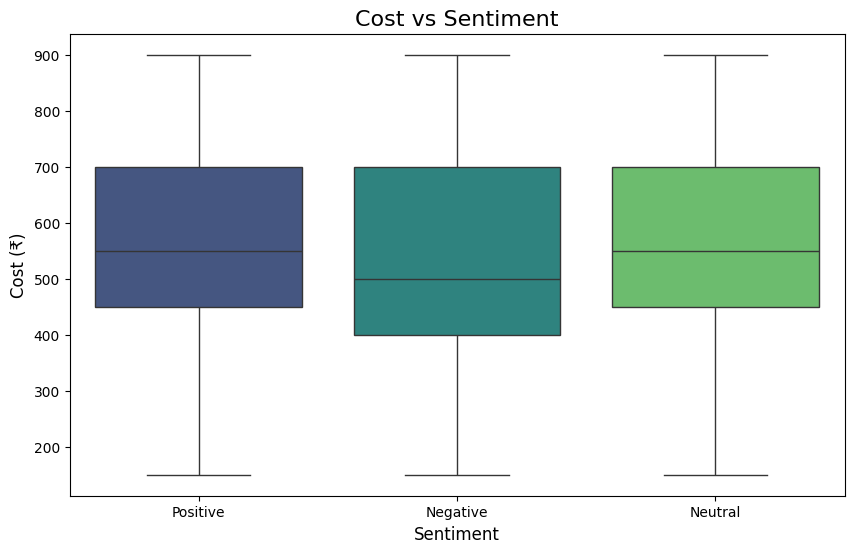

In [39]:
# Convert 'Cost' to numeric (if needed)
merged_df['Cost'] = pd.to_numeric(merged_df['Cost'], errors='coerce')

# Boxplot of cost by sentiment
plt.figure(figsize=(10, 6))
sns.boxplot(x='Sentiment', y='Cost', data=merged_df, palette="viridis")
plt.title('Cost vs Sentiment', fontsize=16)
plt.xlabel('Sentiment', fontsize=12)
plt.ylabel('Cost (₹)', fontsize=12)
plt.show()


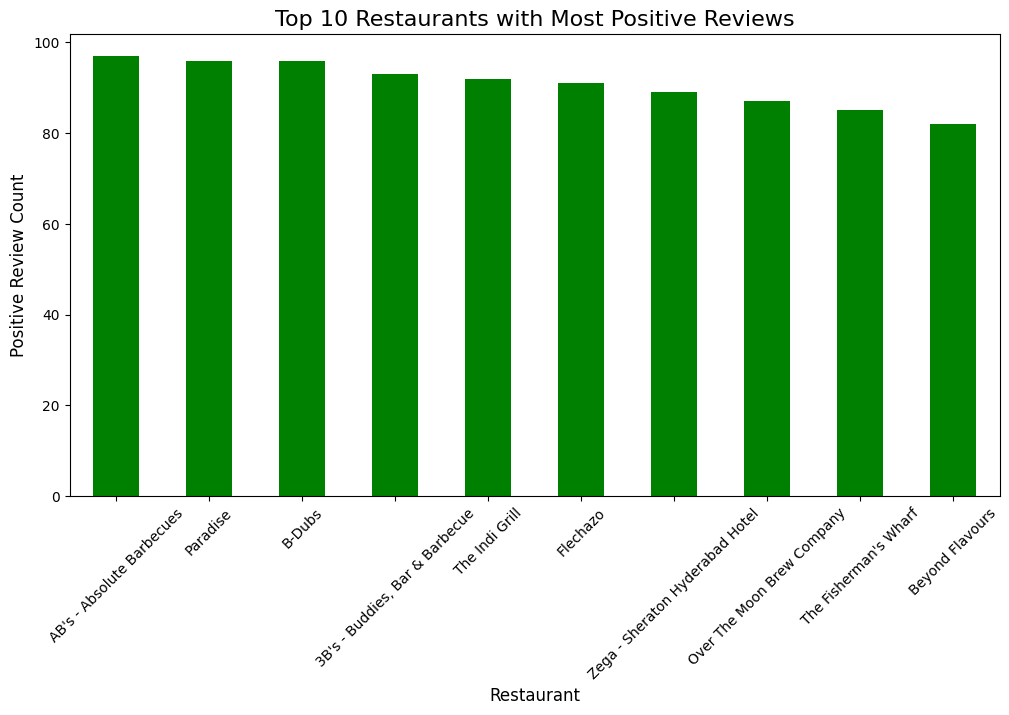

In [40]:
# Count positive reviews per restaurant
restaurant_sentiment = merged_df[merged_df['Sentiment'] == 'Positive'].groupby('Restaurant').size().sort_values(ascending=False).head(10)

# Plot the results
restaurant_sentiment.plot(kind='bar', figsize=(12, 6), color='green')
plt.title('Top 10 Restaurants with Most Positive Reviews', fontsize=16)
plt.xlabel('Restaurant', fontsize=12)
plt.ylabel('Positive Review Count', fontsize=12)
plt.xticks(rotation=45)
plt.show()


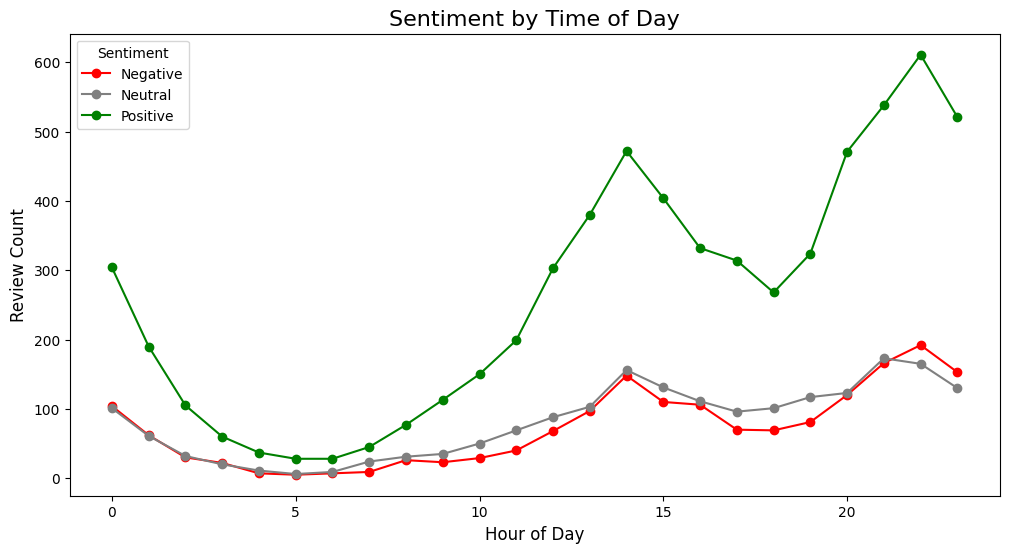

In [43]:
# Ensure 'Time' is in datetime format
merged_df['Time'] = pd.to_datetime(merged_df['Time'], errors='coerce')

# Drop rows with invalid 'Time' values
merged_df.dropna(subset=['Time'], inplace=True)

# Extract the hour
merged_df['Hour'] = merged_df['Time'].dt.hour

# Group reviews by hour and sentiment
hourly_sentiment = merged_df.groupby('Hour')['Sentiment'].value_counts().unstack(fill_value=0)

# Plot sentiment by hour
hourly_sentiment.plot(kind='line', figsize=(12, 6), marker='o', color=['red', 'gray', 'green'])
plt.title('Sentiment by Time of Day', fontsize=16)
plt.xlabel('Hour of Day', fontsize=12)
plt.ylabel('Review Count', fontsize=12)
plt.legend(title='Sentiment')
plt.show()


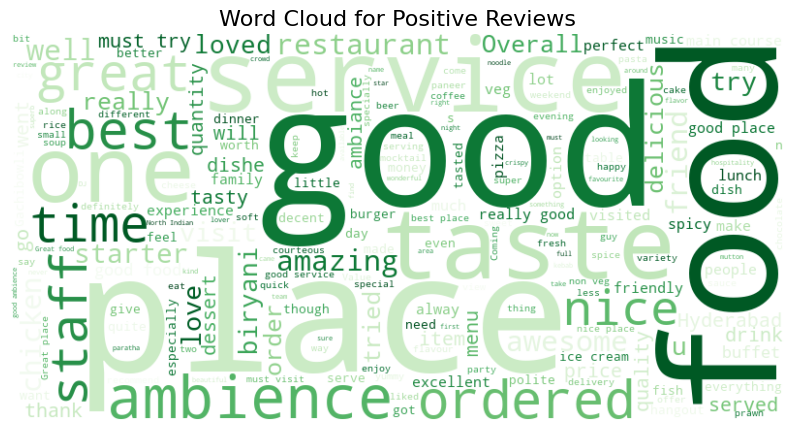

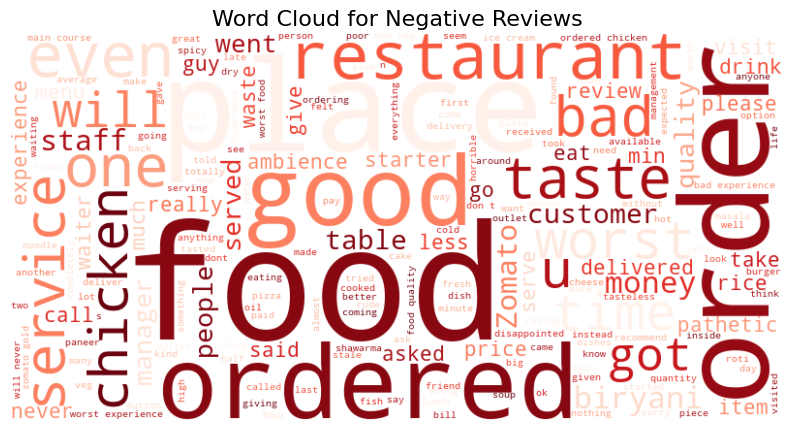

In [44]:
# Convert all reviews to strings, replace NaN with an empty string
merged_df['Review'] = merged_df['Review'].fillna('').astype(str)

# Generate word clouds
positive_reviews = " ".join(merged_df[merged_df['Sentiment'] == 'Positive']['Review'])
negative_reviews = " ".join(merged_df[merged_df['Sentiment'] == 'Negative']['Review'])

# Positive Word Cloud
positive_wordcloud = WordCloud(background_color='white', colormap='Greens', width=800, height=400).generate(positive_reviews)
plt.figure(figsize=(10, 6))
plt.imshow(positive_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Positive Reviews', fontsize=16)
plt.show()

# Negative Word Cloud
negative_wordcloud = WordCloud(background_color='white', colormap='Reds', width=800, height=400).generate(negative_reviews)
plt.figure(figsize=(10, 6))
plt.imshow(negative_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Negative Reviews', fontsize=16)
plt.show()
